In [1]:
import pandas as pd
import numpy as np

import textwrap

import matplotlib
import matplotlib.pyplot as plt

### Reading data

In [2]:
metrics = pd.read_csv('performanceMetrics.csv')
metrics['PlanningAlgorithm']=metrics['PlanningAlgorithm'].replace({'Depth First (LIFO)':'LIFO Planner',
                                                                   'Breadth First (FIFO)': 'FIFO Planner',
                                                                   'Dijkstra\'s':'Dijkstra\'s Algorithm'})

In [3]:
metrics.head(11)

,PlanningAlgorithm,mapName,numberOfCellsVisited,maximumLengthOfQueue,totalAngleTurned,pathTravelCost,pathCardinality
0,LIFO Planner,empty,4255,1648,4185.0,359.090101,256
1,Greedy Planner,empty,180,136,45.0,60.020456,46
2,Dijkstra's Algorithm,empty,2980,150,225.0,60.020456,46
3,A* Algorithm (Heuristic: Constant = 5),empty,2980,149,225.0,60.020456,46
4,A* Algorithm (Heuristic: Euclidean),empty,1047,220,495.0,60.020456,46
5,A* Algorithm (Heuristic: Octile),empty,945,203,225.0,60.020456,46
6,A* Algorithm (Heuristic: Manhattan),empty,300,205,45.0,60.020456,46
7,A* Algorithm (Heuristic: 0.5*Octile),empty,1941,207,225.0,60.020456,46
8,A* Algorithm (Heuristic: 2*Octile),empty,180,136,45.0,60.020456,46
9,A* Algorithm (Heuristic: 10*Octile),empty,180,136,45.0,60.020456,46


### Function definitions

In [4]:
def plot_grouped_bar_graph(data, metric_col, planning_algorithms,removeEmptyTerrainCase=False,
                           title=None,y_label=None,ax=None,
                           savefig=False, filename = None):
    
    # Determine plot data and associated parameters
    label_name=data['mapName'].unique()
    n_maps=len(label_name)

    bar_data=[]
    for map_name in label_name:
        alg_data=[]
        for algorithm in planning_algorithms:
            if removeEmptyTerrainCase and (algorithm=='A* Algorithm (Heuristic: Manhattan)') and (map_name=='empty_terrain'):
                alg_data.append(0)
            else:
                alg_data.append(data[(data['PlanningAlgorithm']==algorithm) & (data['mapName']==map_name)][metric_col].to_list()[0])
        bar_data.append(np.array(alg_data))

    # Define x tick locations
    x = np.arange(len(planning_algorithms)) 
    # Set width of the bar plot
    width = 0.8/n_maps 
    
    # Plot the bar graph
    if ax is None:
        fig, ax = plt.subplots(figsize=(20,10))
    if (n_maps%2==0):
        for i in range(n_maps//2):
            ax.bar(x - (2*i+1)*width/2, bar_data[n_maps//2 - (i+1)], width, label=label_name[n_maps//2 - (i+1)])
            ax.bar(x + (2*i+1)*width/2, bar_data[n_maps//2 + i], width, label=label_name[n_maps//2 + i])
    else:
        ax.bar(x, bar_data[n_maps//2], width,label=label_name[n_maps//2])
        for i in range(n_maps//2):
            ax.bar(x - (i+1)*width, bar_data[n_maps//2 - (i+1)], width,label=label_name[n_maps//2 - (i+1)])
            ax.bar(x + (i+1)*width, bar_data[n_maps//2 + i], width,label=label_name[n_maps//2 + i])
            
    # Check if title was passed
    if title is None:
        title = metric_col + ' for each algorithm'
    if y_label is None:
        y_label = metric_col

    # Add title, axis labels and tick labels
    ax.set_ylabel(y_label,fontsize=22,fontweight='bold')
    ax.set_xlabel('Algorithms',fontsize=22,fontweight='bold')
    ax.set_title(title,fontsize=24,fontweight='bold')
    ax.set_xticks(x)
    planning_algorithms=[textwrap.fill(name,15) for name in planning_algorithms]
    ax.set_xticklabels(planning_algorithms,fontsize=16)
    ax.legend(fontsize=18)

    # If savefig is True,  save the figure
    if savefig:
        if filename is None:
            filename = '../report/images/'+title + '.png'
        plt.savefig(filename)
    return ax


### Grouped bar graphs

The below was code for combined graph.

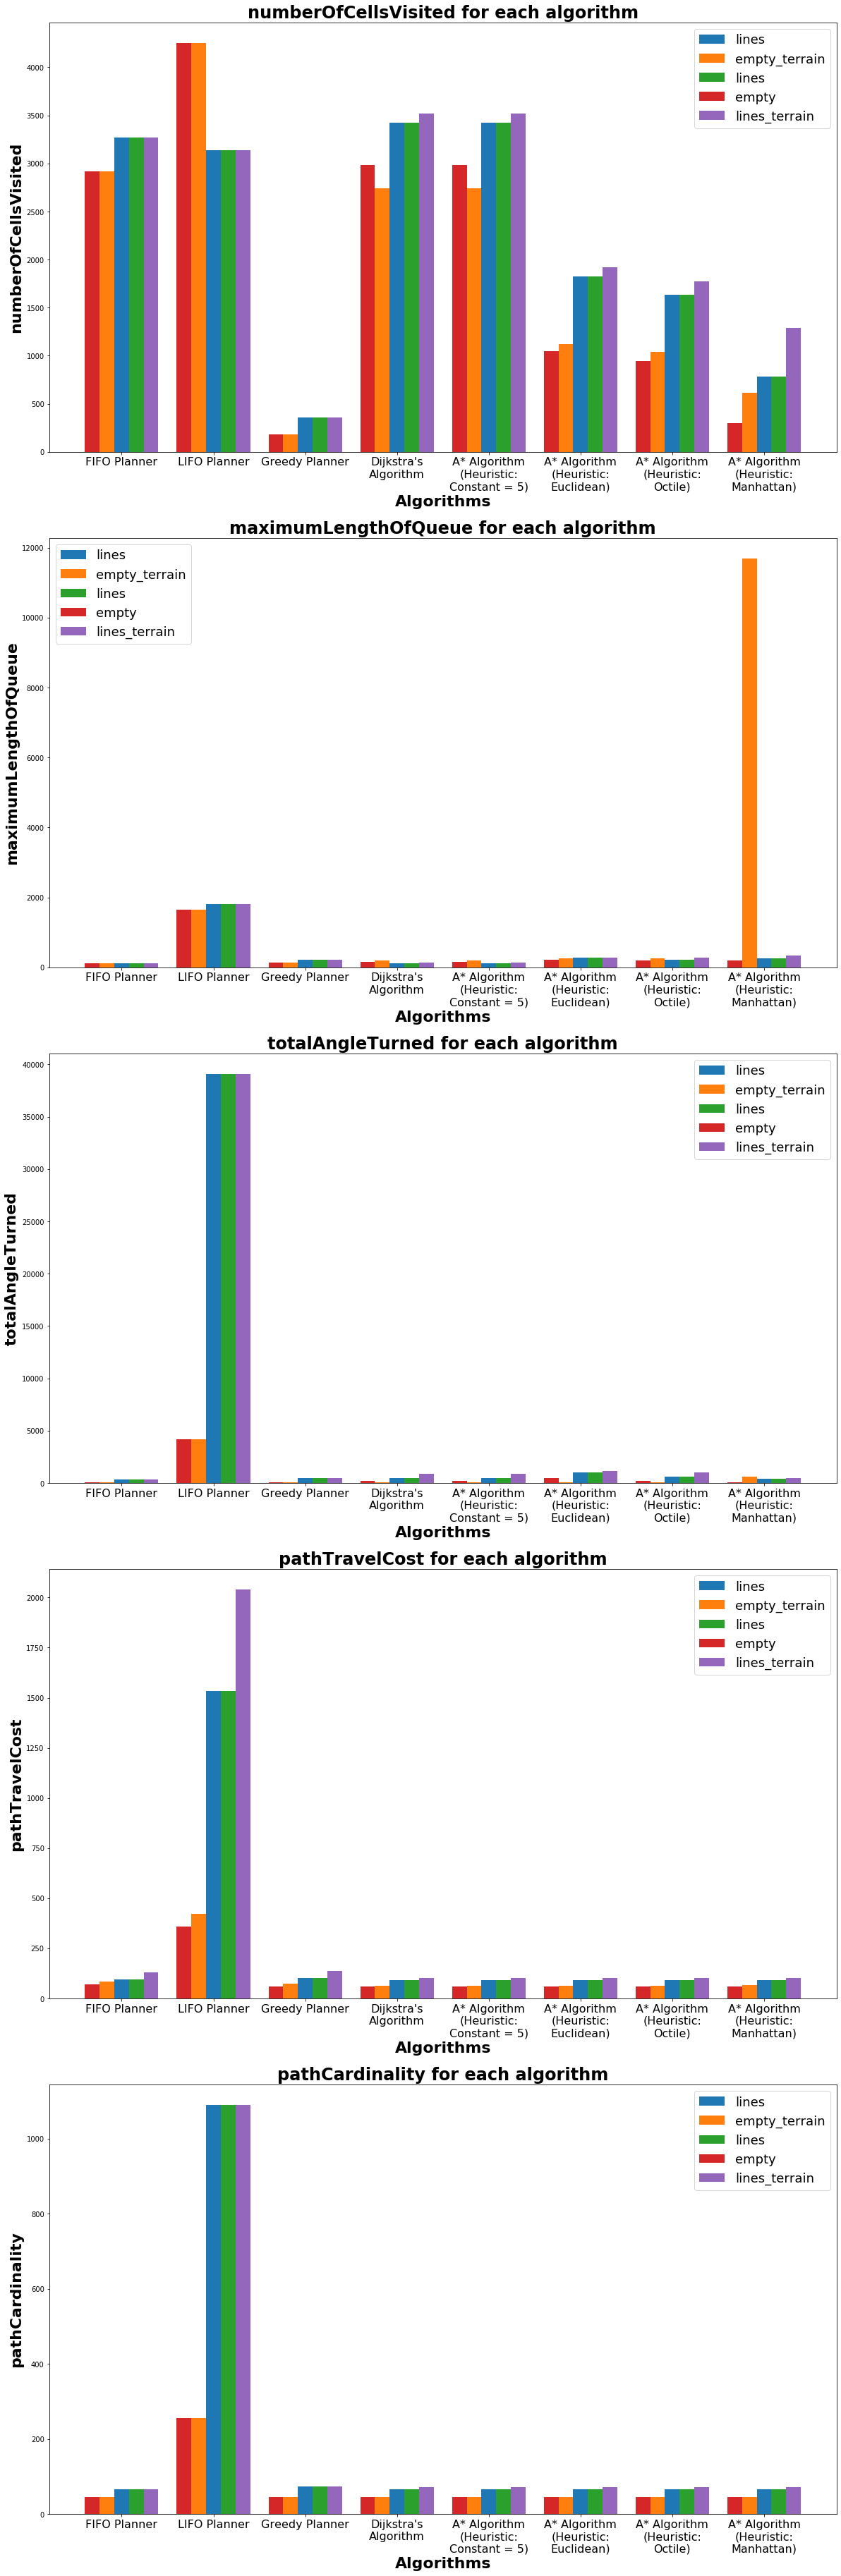

In [5]:
# # List of Planning algorithms
# planning_algorithms=['FIFO Planner','LIFO Planner','Greedy Planner','Dijkstra\'s Algorithm',
#                      'A* Algorithm (Heuristic: Constant = 5)', 'A* Algorithm (Heuristic: Euclidean)',
#                      'A* Algorithm (Heuristic: Octile)', 'A* Algorithm (Heuristic: Manhattan)']
# fig, axes = plt.subplots(5,1,figsize=(20,65))
# i=0
# for metric in metrics.columns[2:]:
#     plot_grouped_bar_graph(metrics, metric,planning_algorithms,ax=axes[i], savefig=True,
#                            filename='../report/images/combined_barchart.png')
#     i+=1
# plt.show()

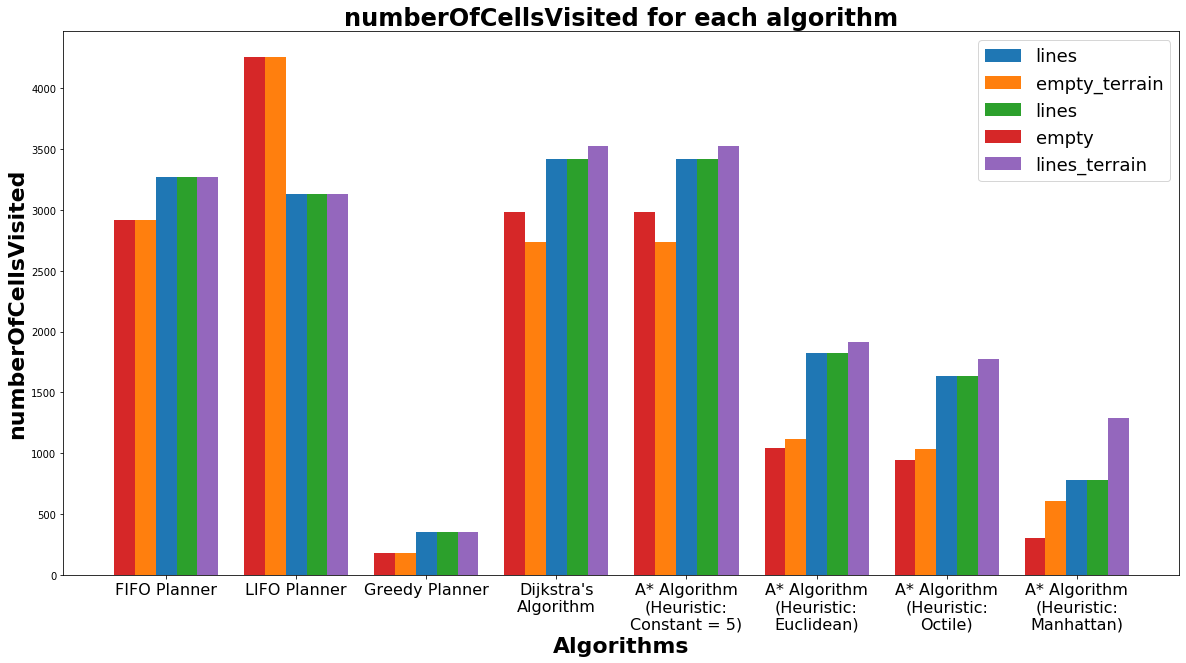

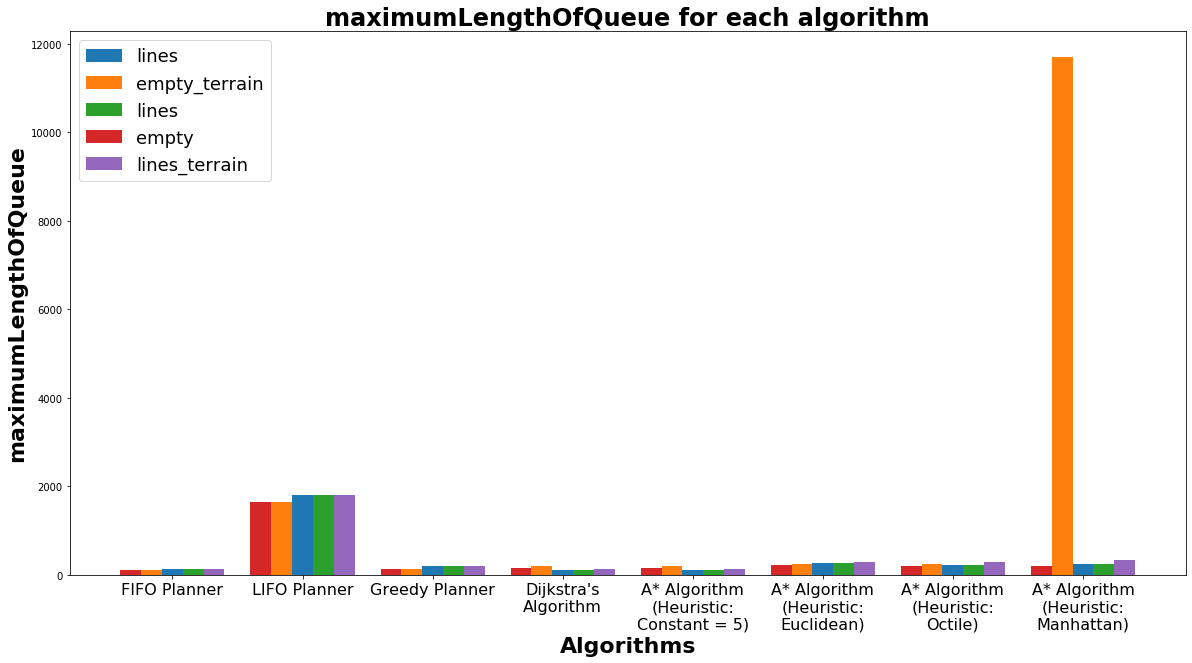

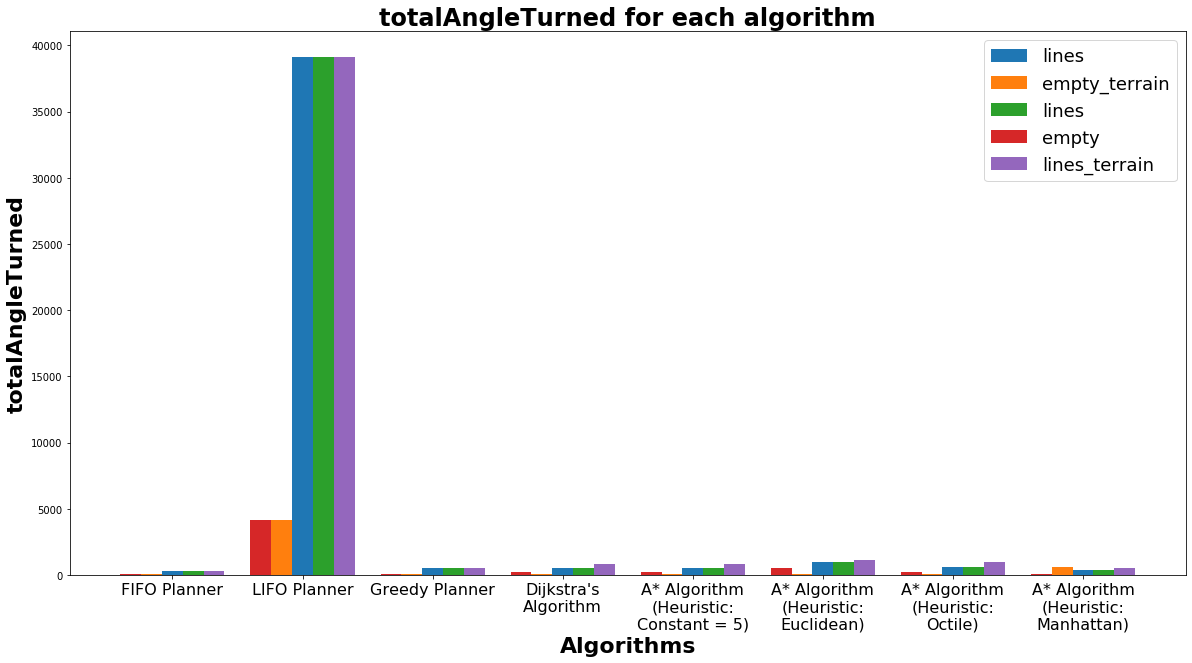

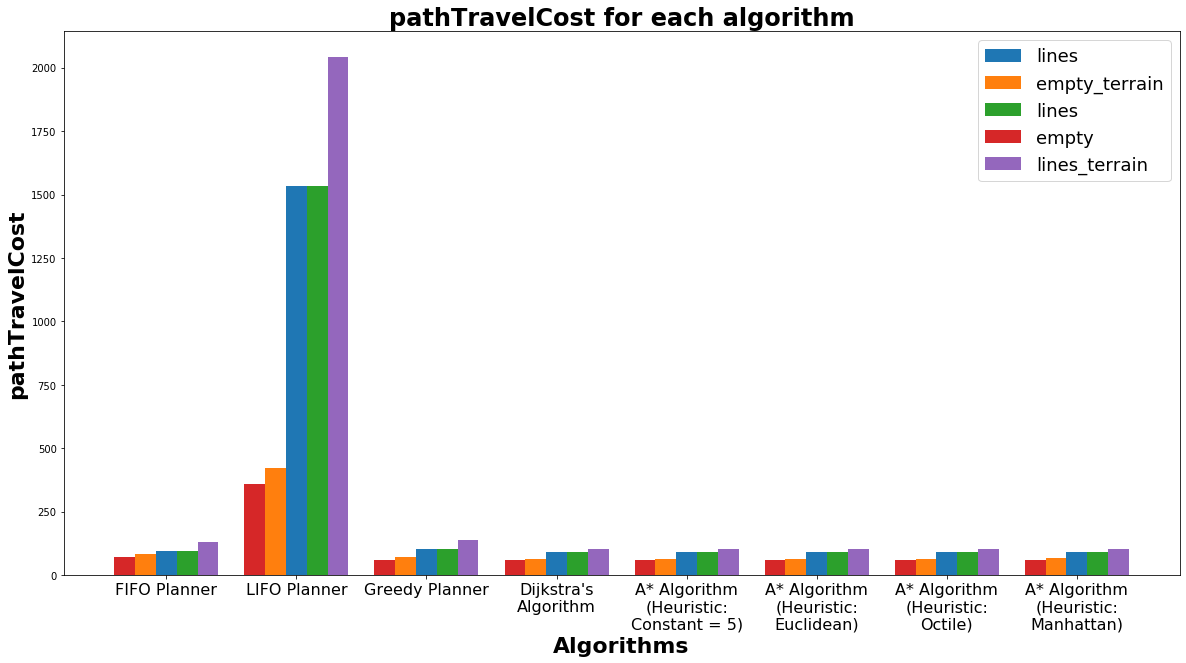

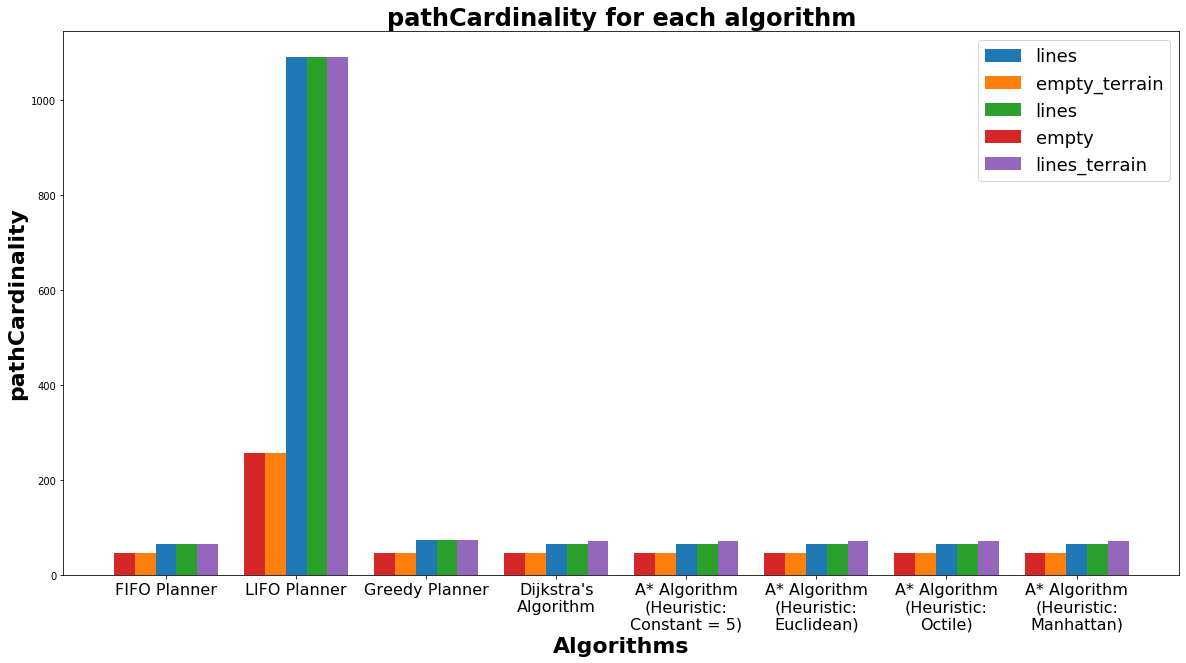

In [6]:
# List of Planning algorithms
planning_algorithms=['FIFO Planner','LIFO Planner','Greedy Planner','Dijkstra\'s Algorithm',
                     'A* Algorithm (Heuristic: Constant = 5)', 'A* Algorithm (Heuristic: Euclidean)',
                     'A* Algorithm (Heuristic: Octile)', 'A* Algorithm (Heuristic: Manhattan)']

for metric in metrics.columns[2:]:
    plot_grouped_bar_graph(metrics, metric,planning_algorithms, savefig=True)

### The above graphs without LIFO

This was done so that the trends can be seen more clearly.

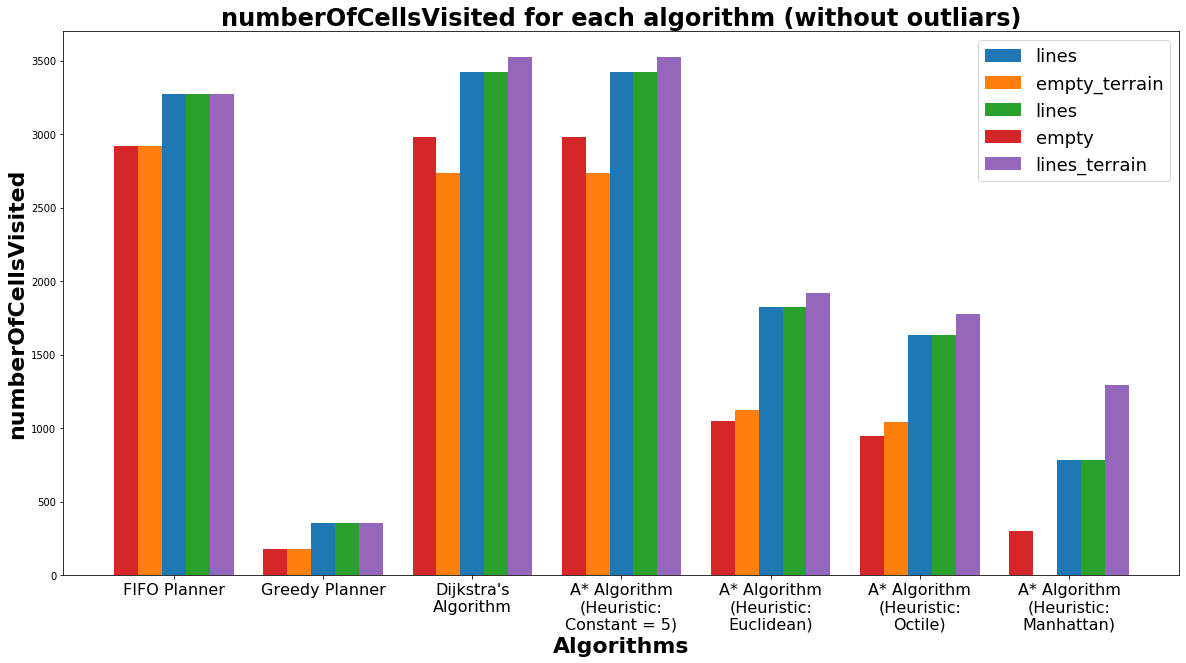

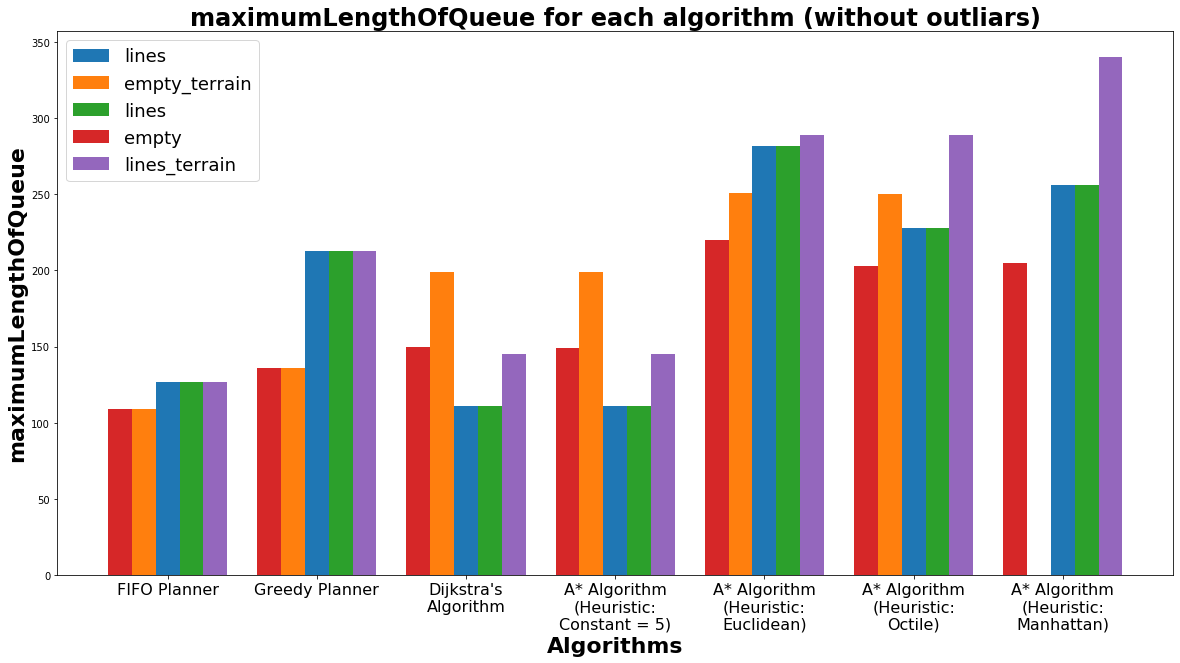

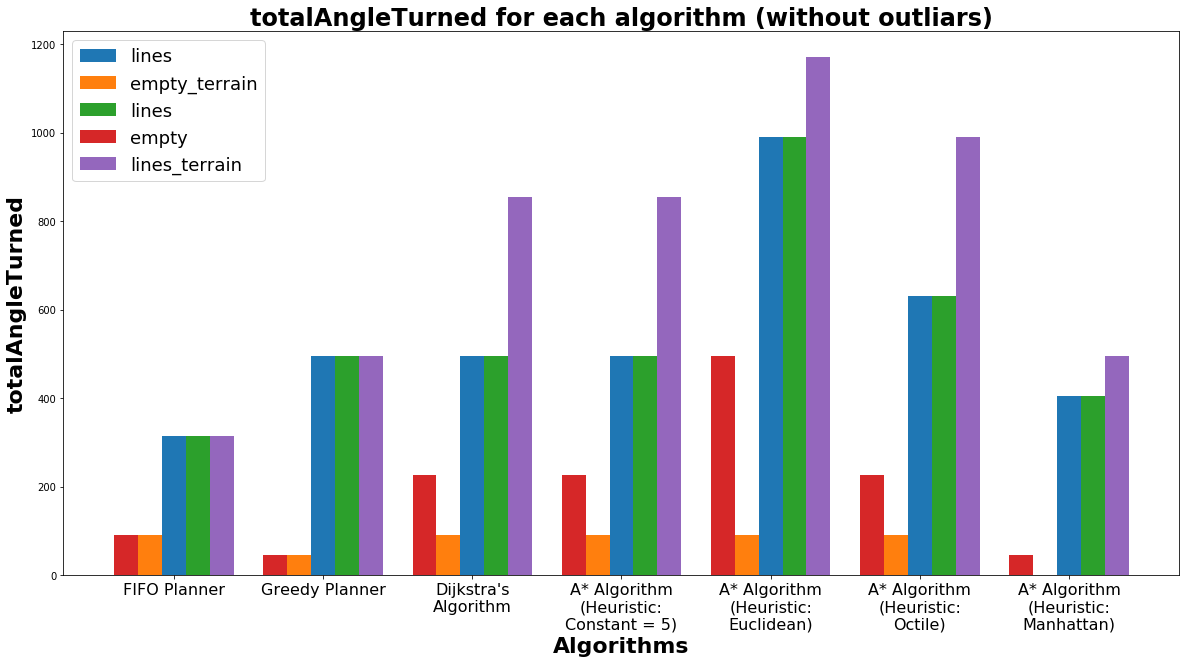

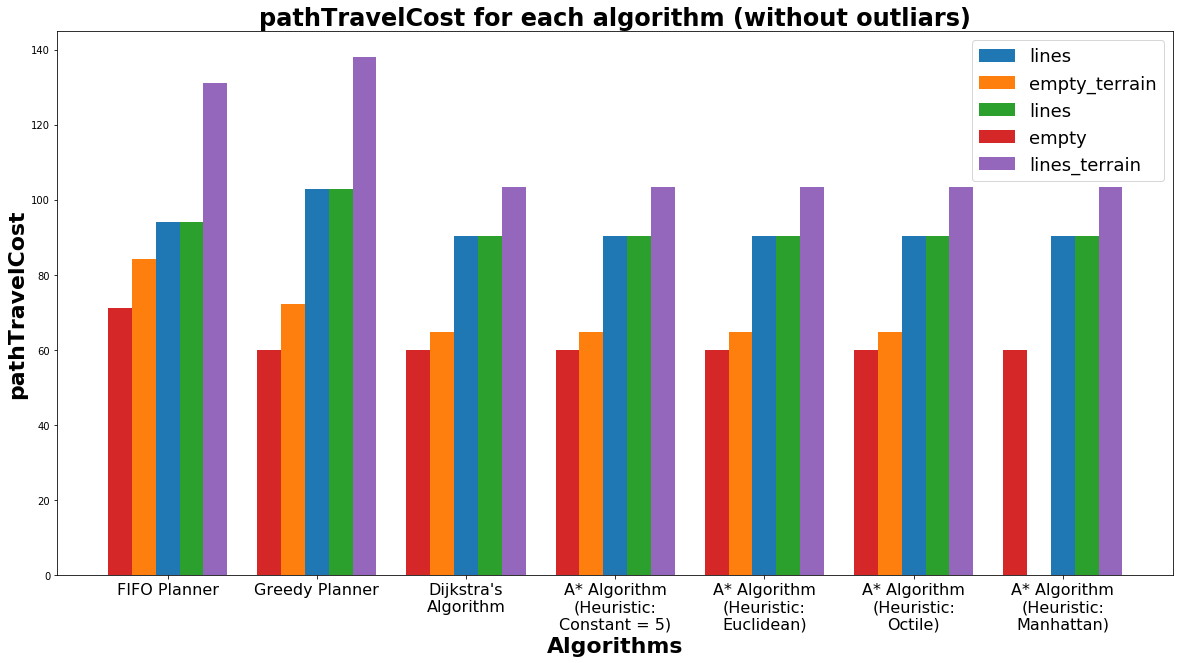

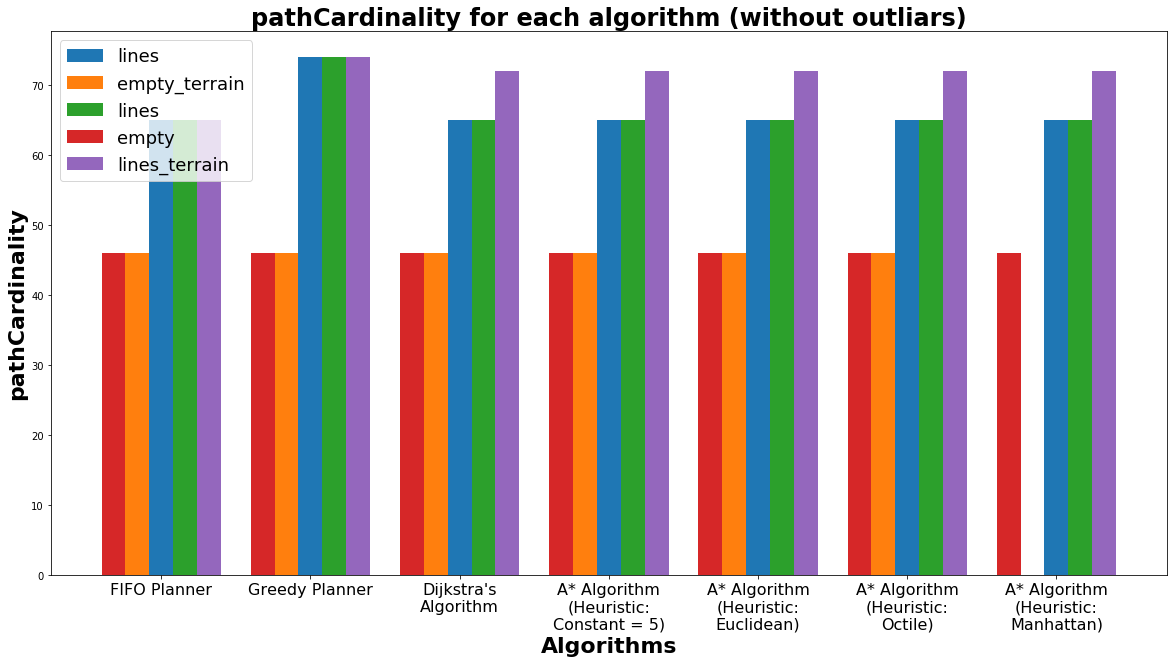

In [7]:
# List of Planning algorithms
planning_algorithms=['FIFO Planner','Greedy Planner','Dijkstra\'s Algorithm',
                     'A* Algorithm (Heuristic: Constant = 5)', 'A* Algorithm (Heuristic: Euclidean)',
                     'A* Algorithm (Heuristic: Octile)', 'A* Algorithm (Heuristic: Manhattan)']

for metric in metrics.columns[2:]:
    plot_grouped_bar_graph(metrics, metric,planning_algorithms, savefig=True, title=metric + ' for each algorithm (without outliars)',
                           filename = '../report/images/without_LIFO_'+metric, removeEmptyTerrainCase=True)

### Individual Graphs

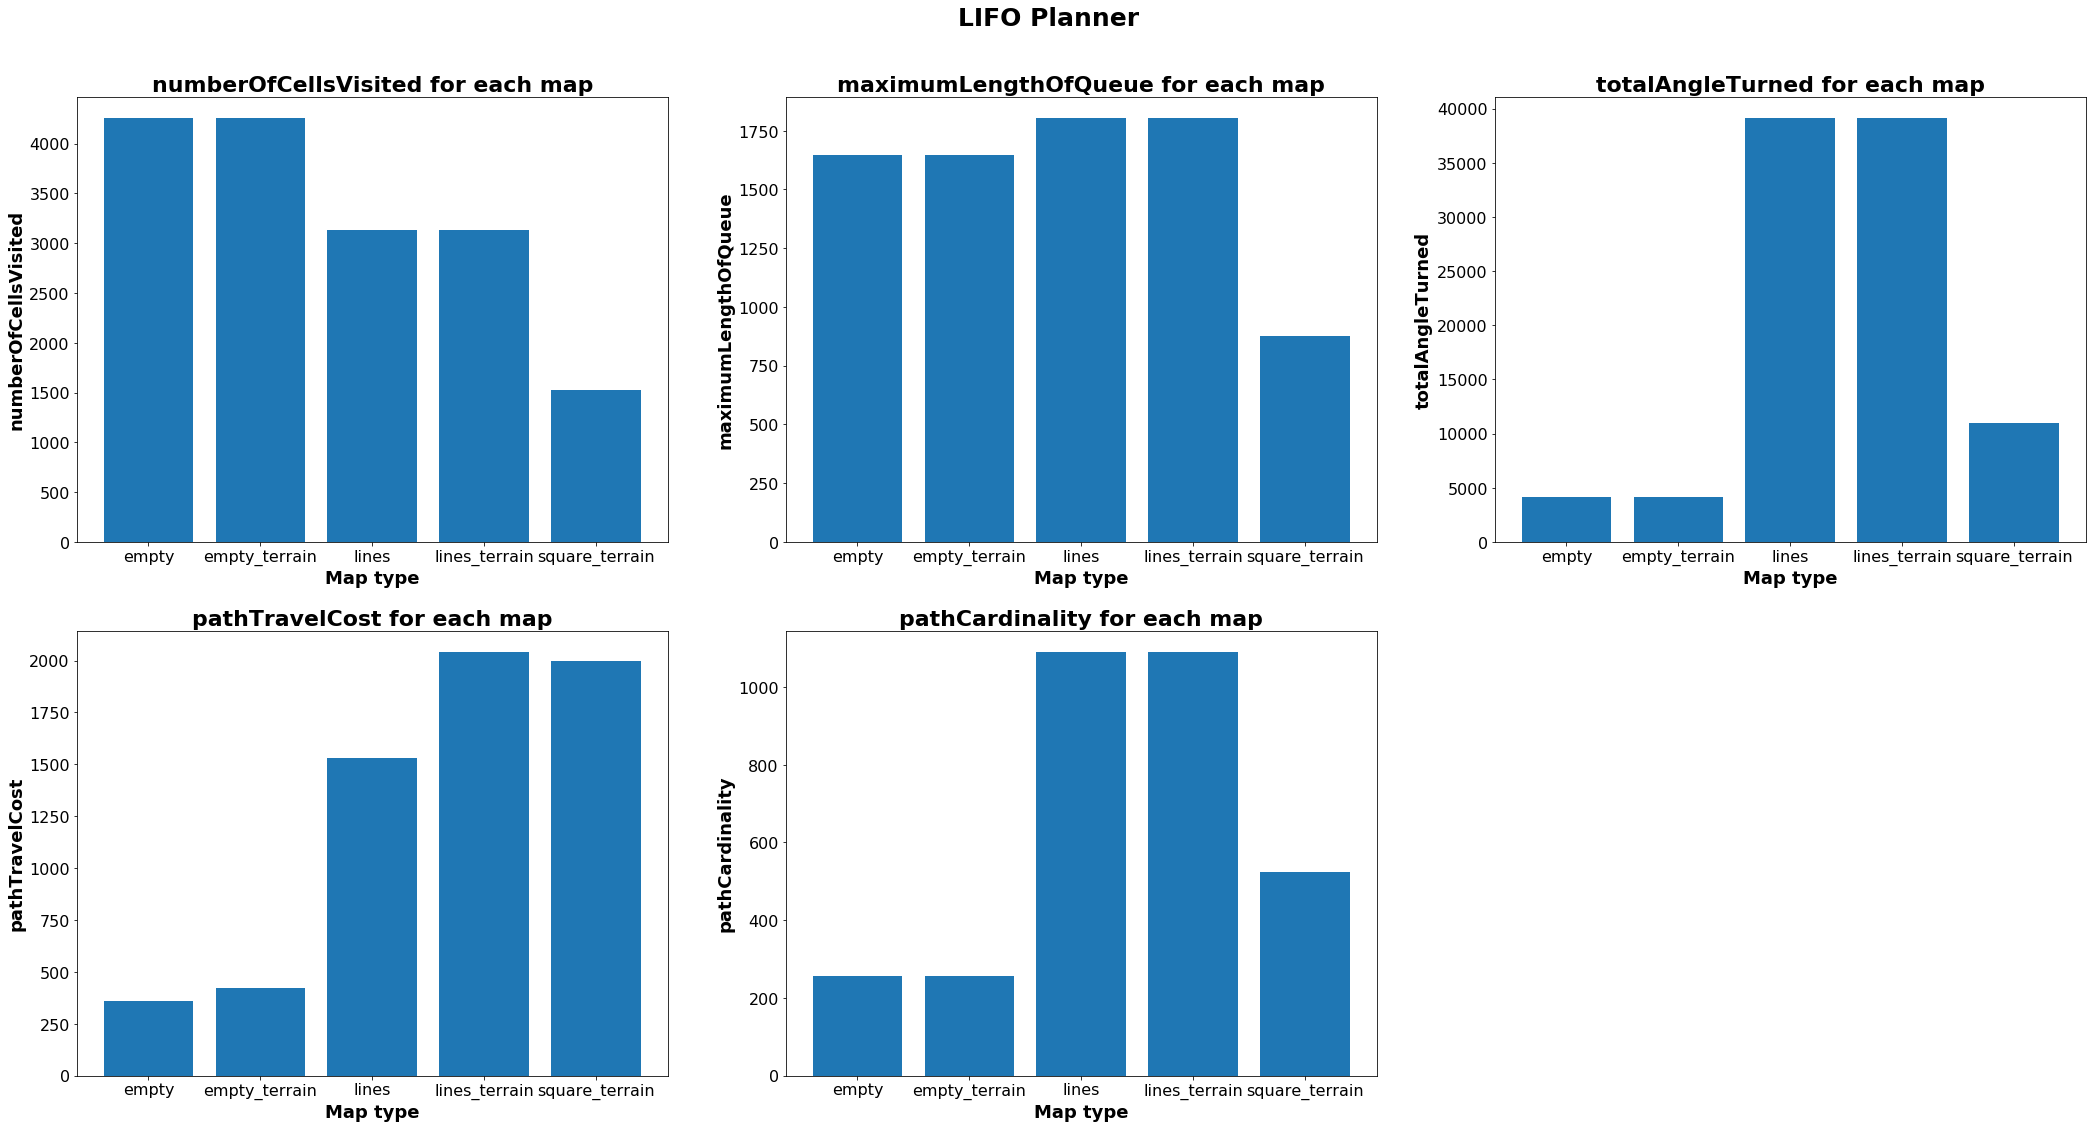

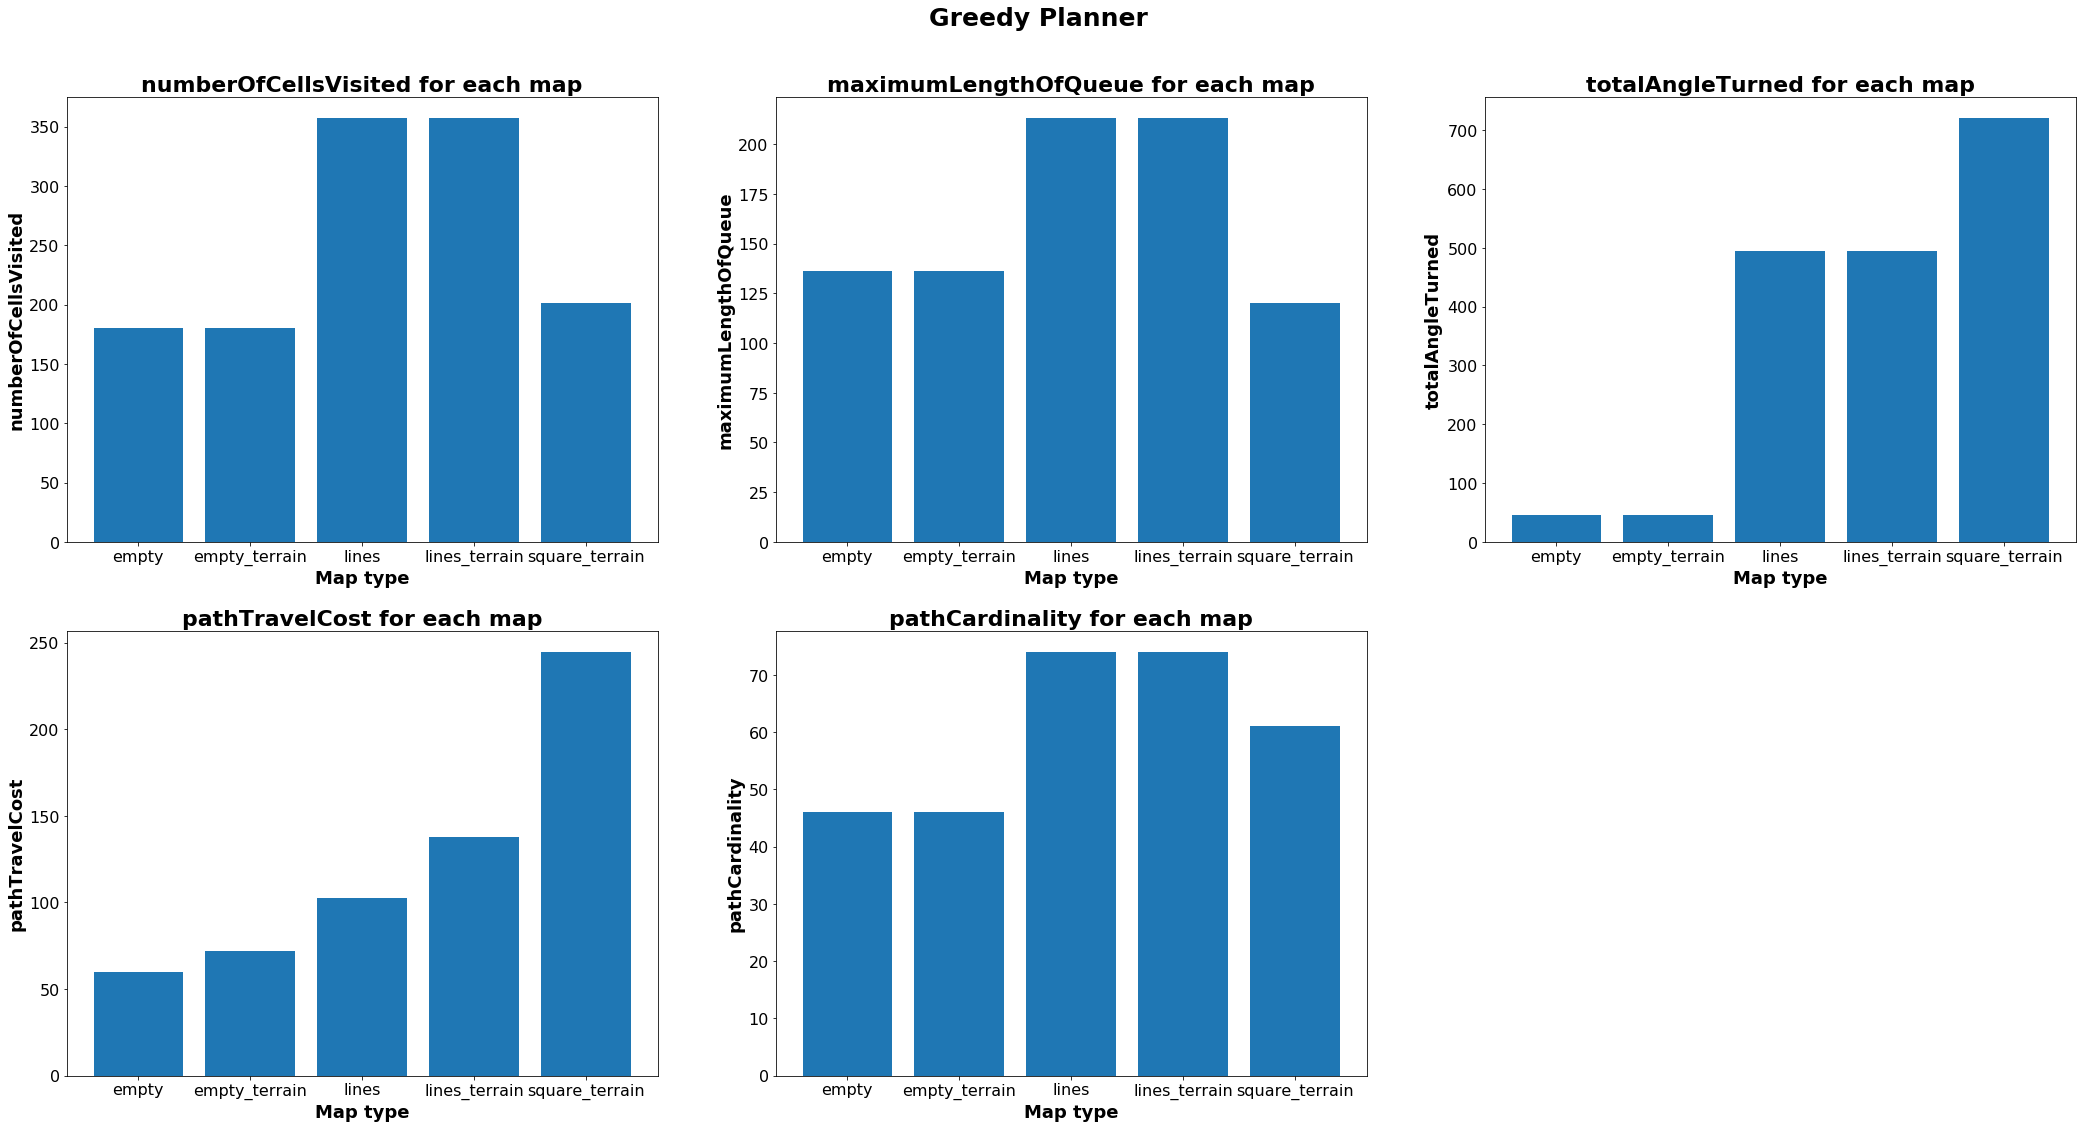

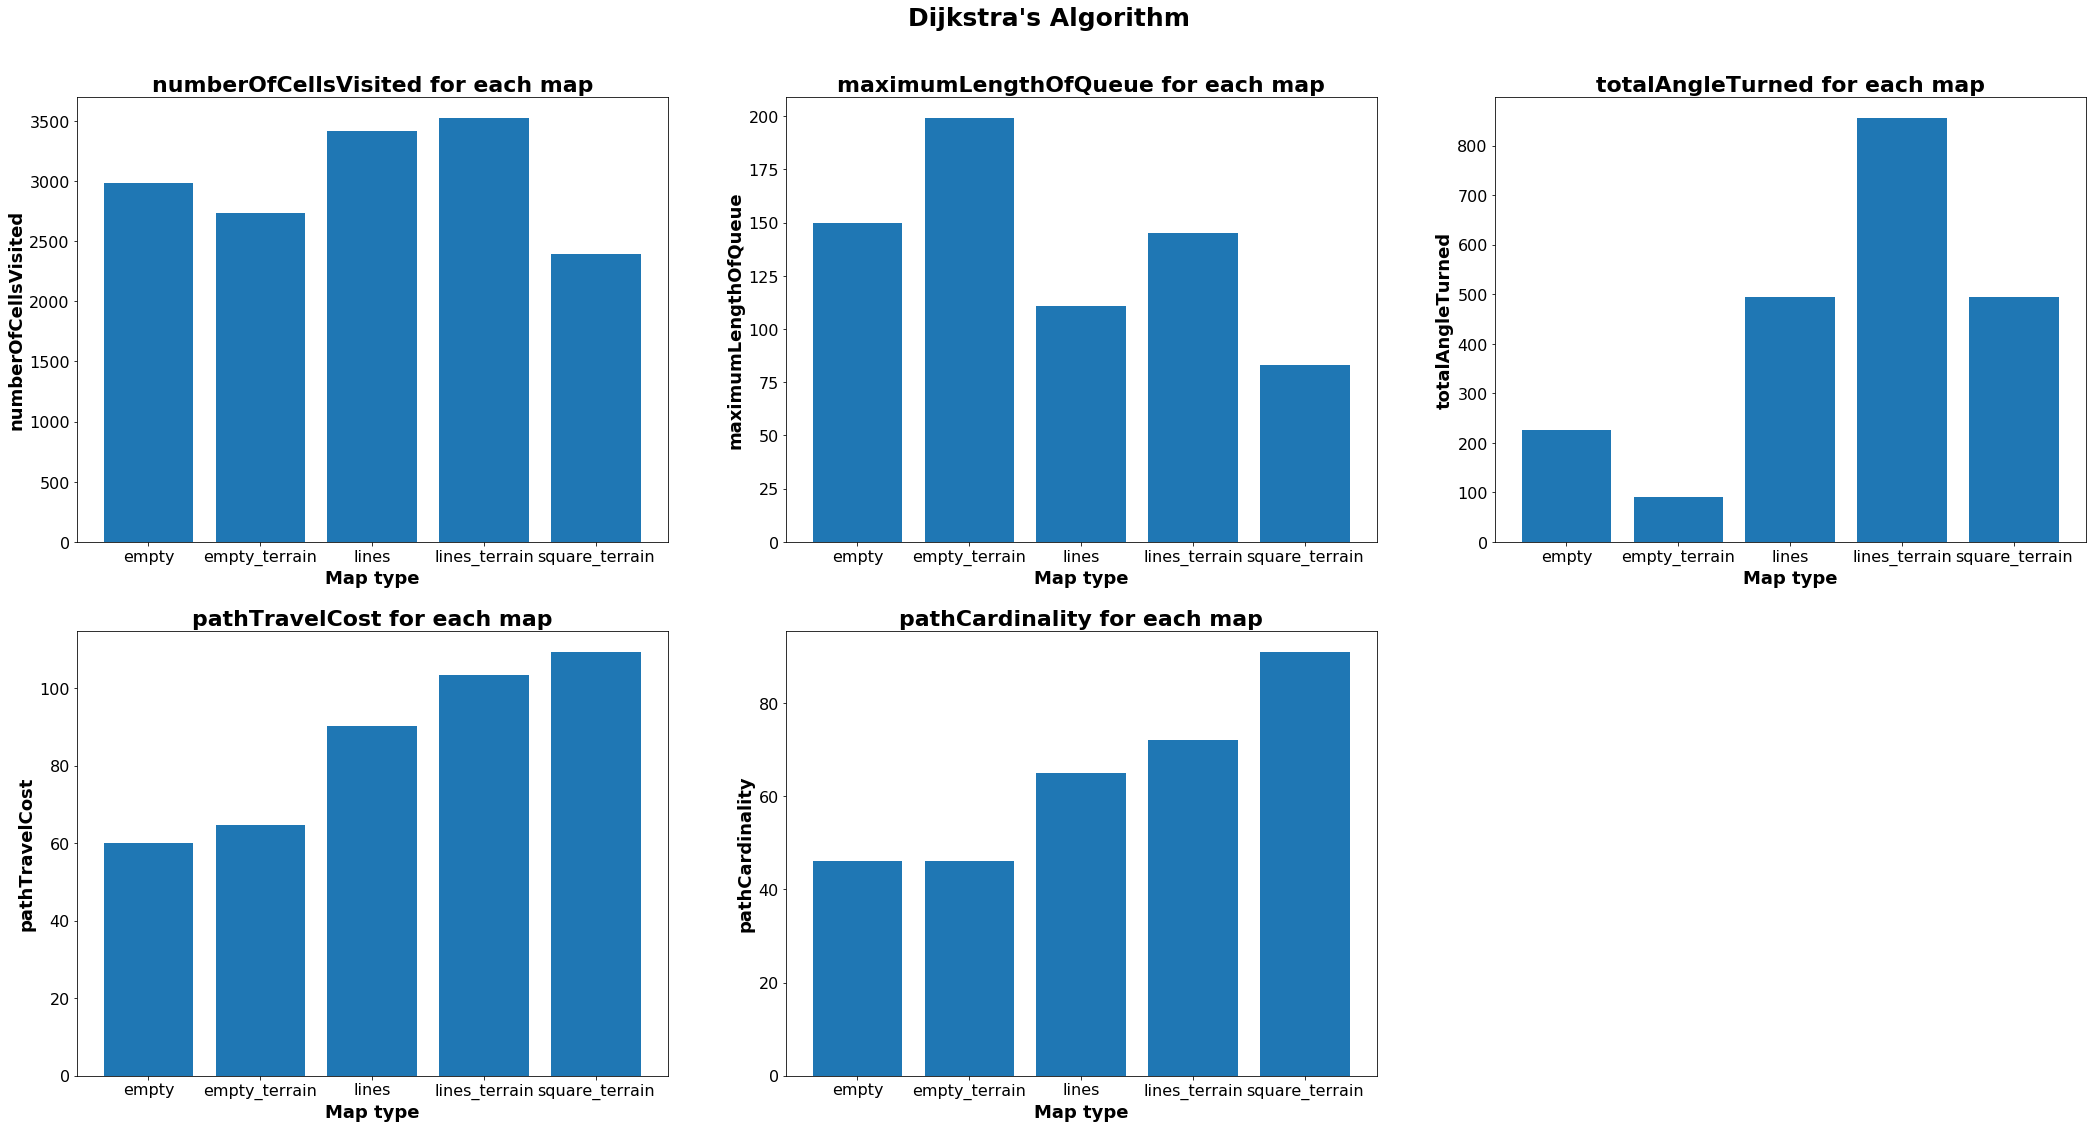

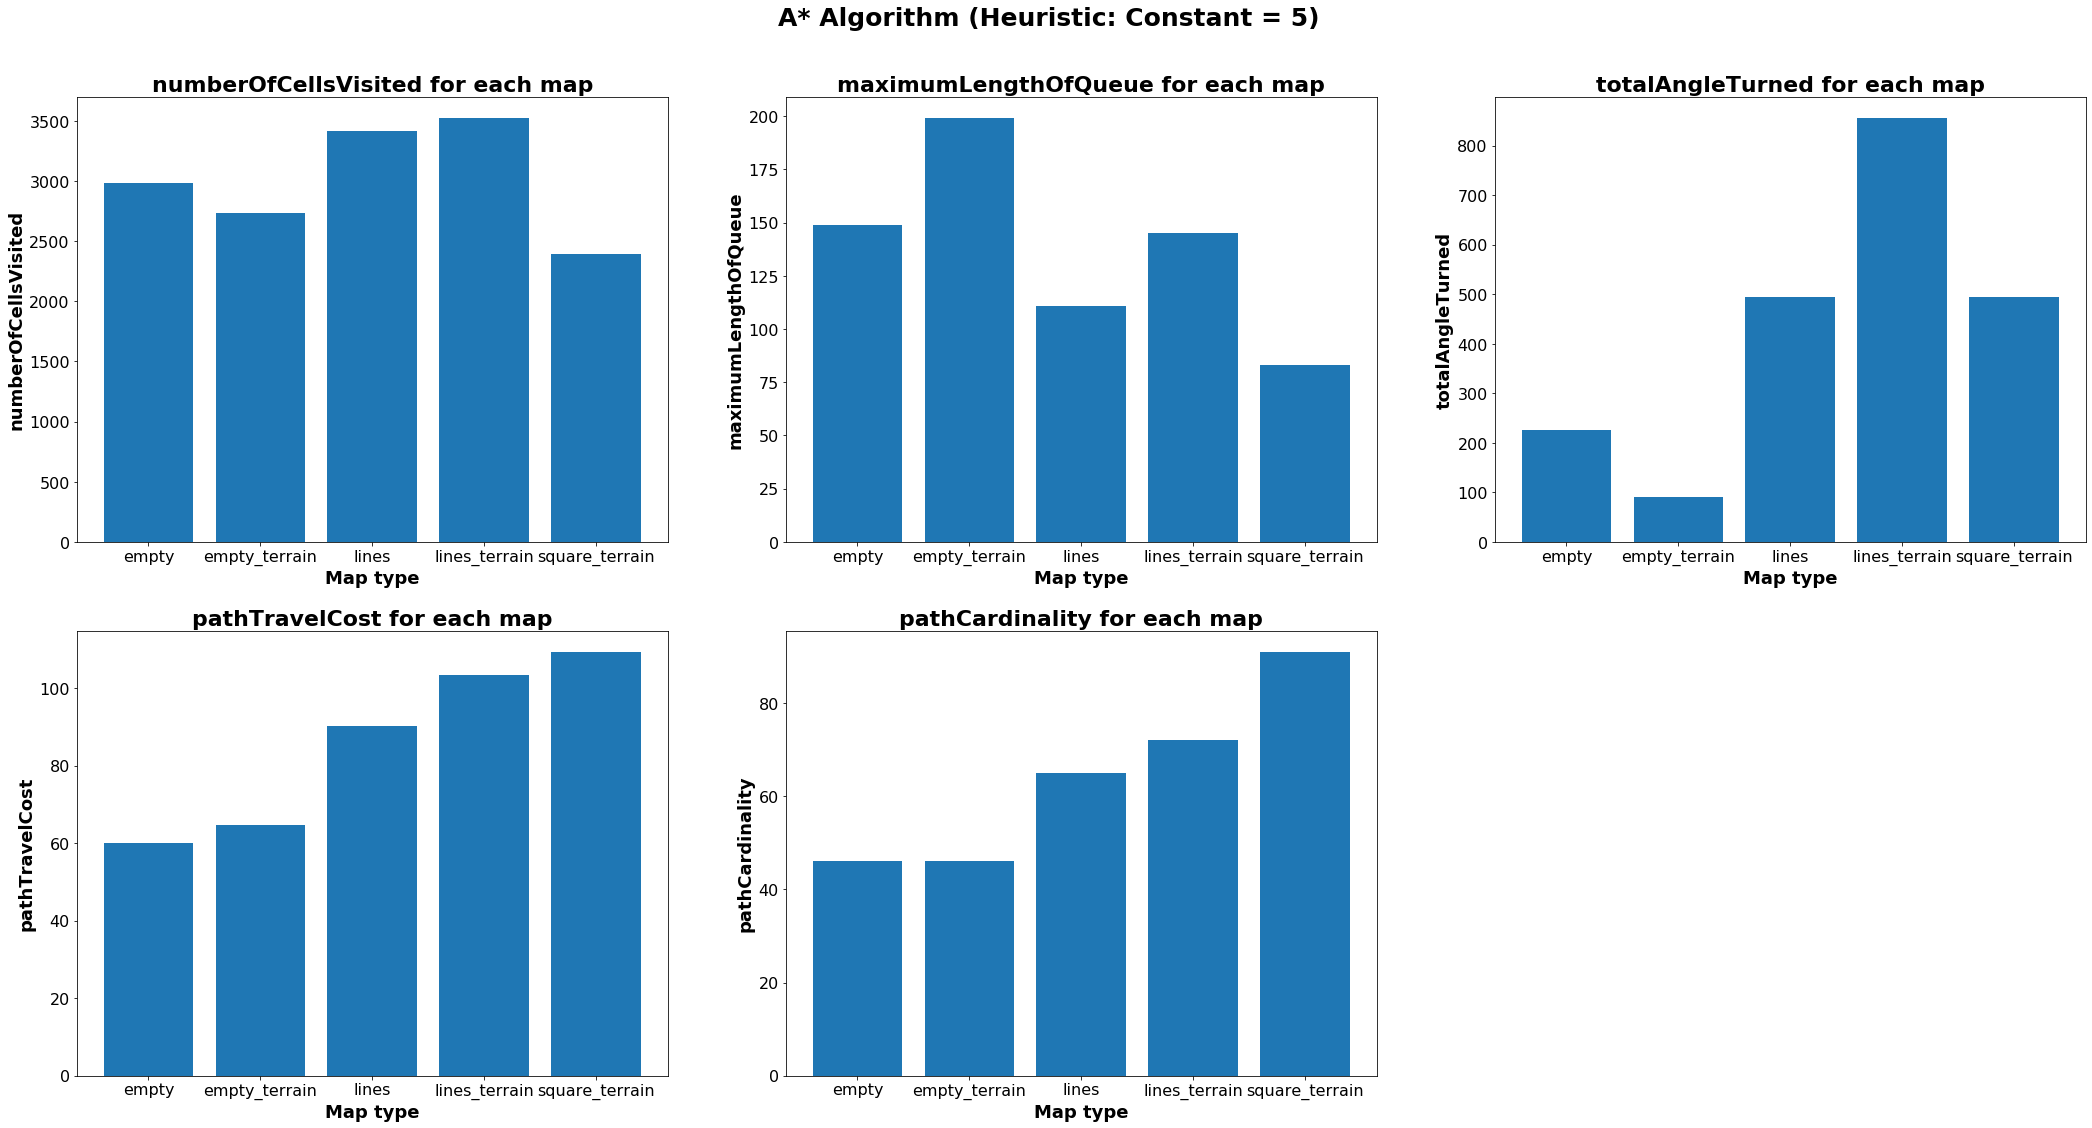

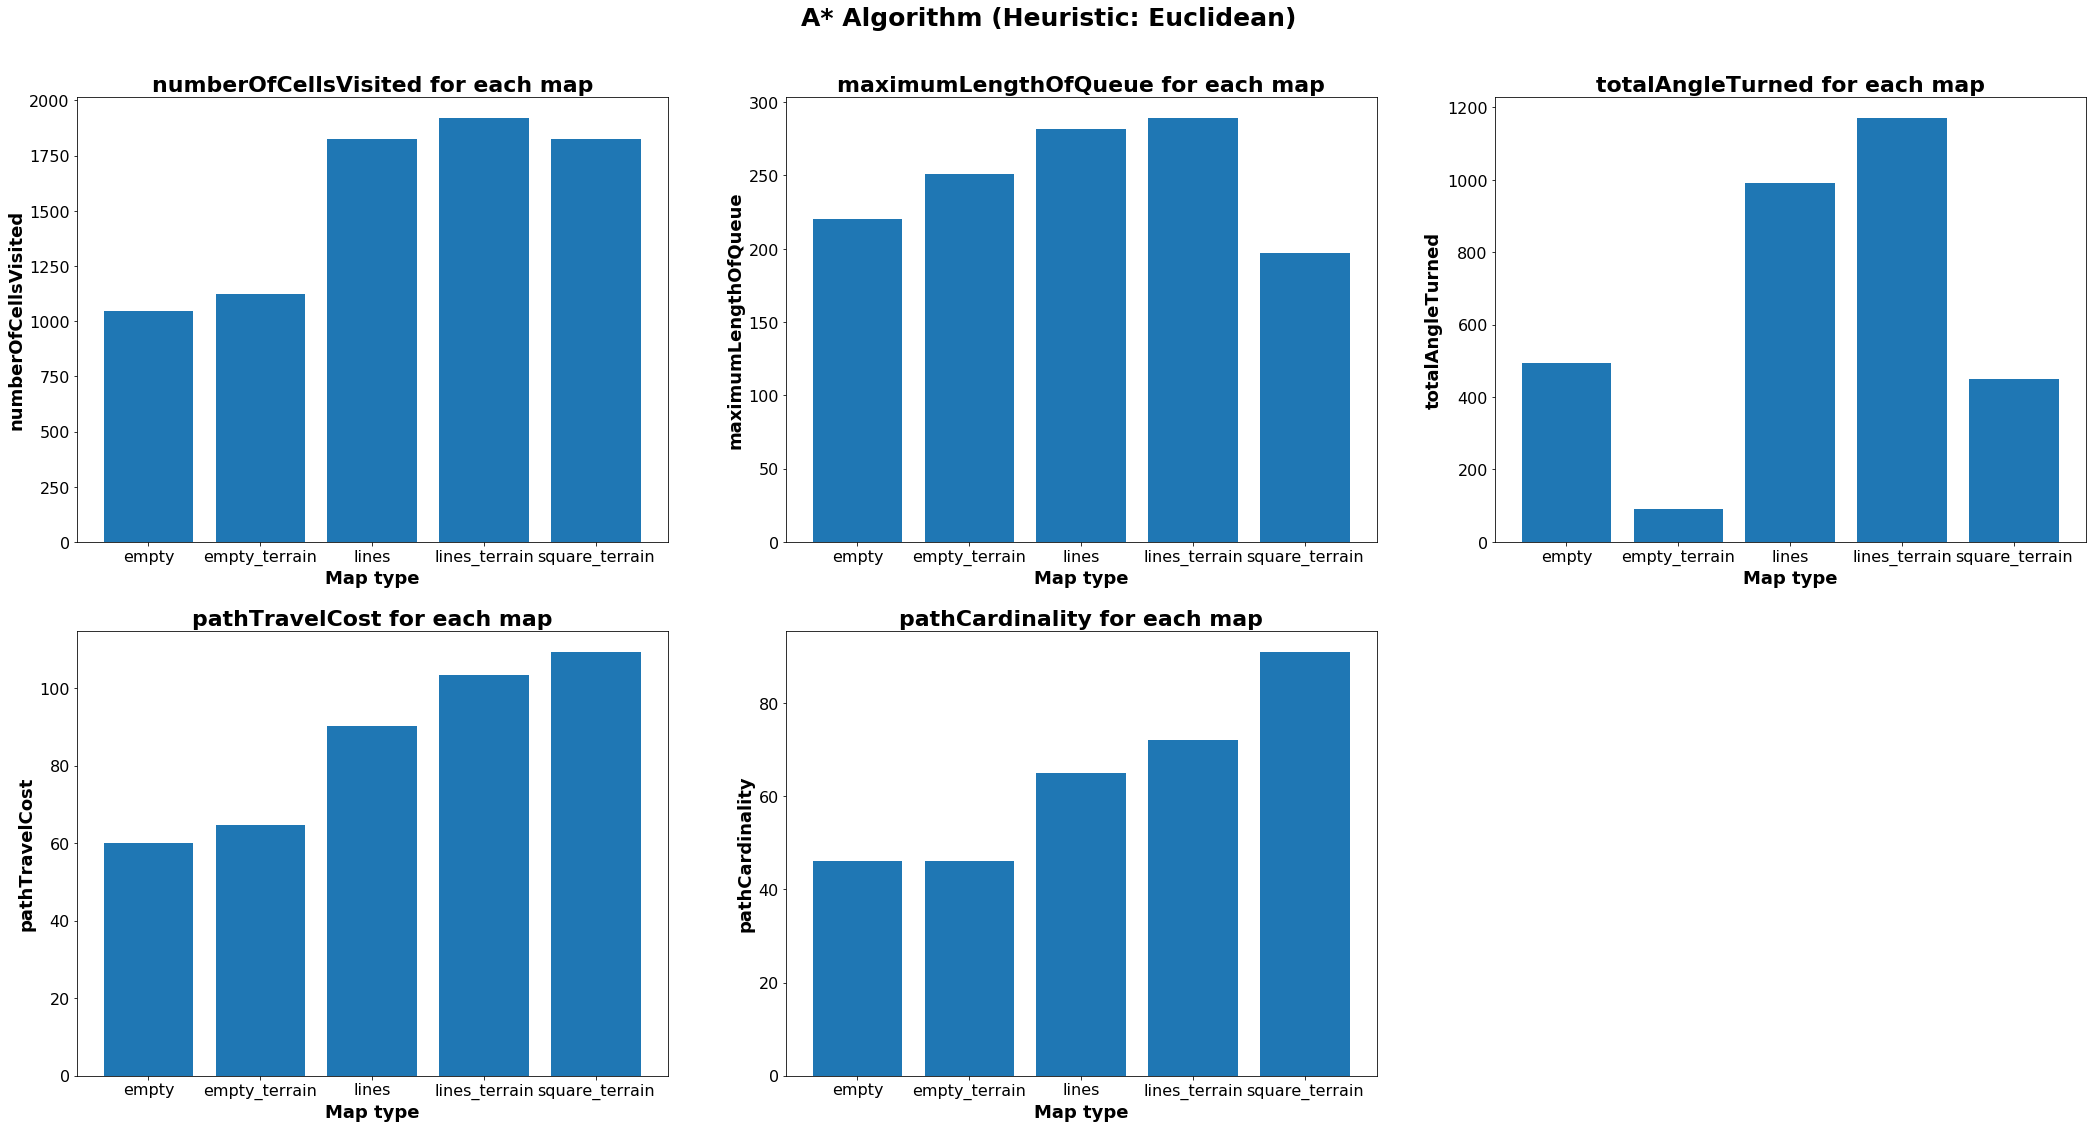

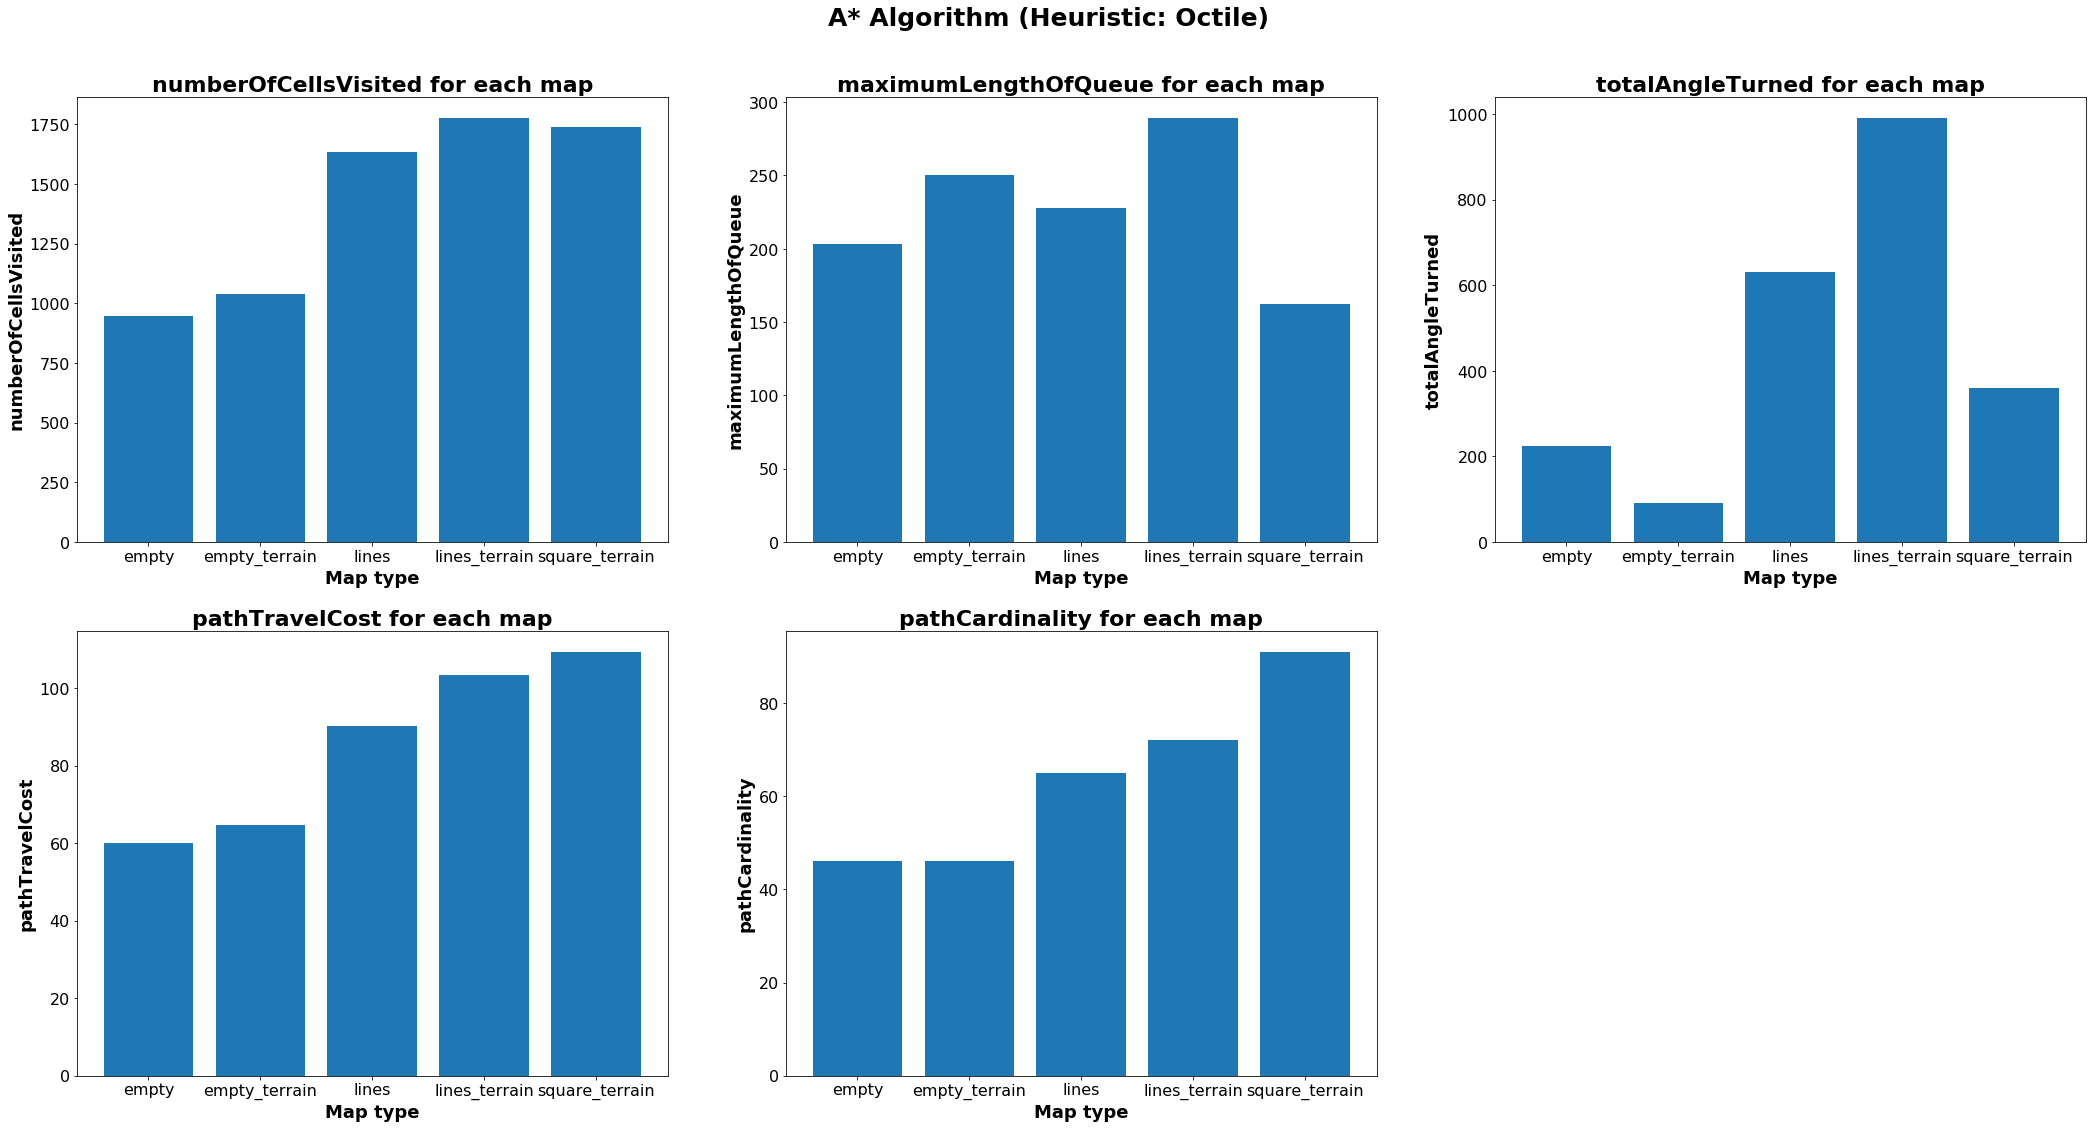

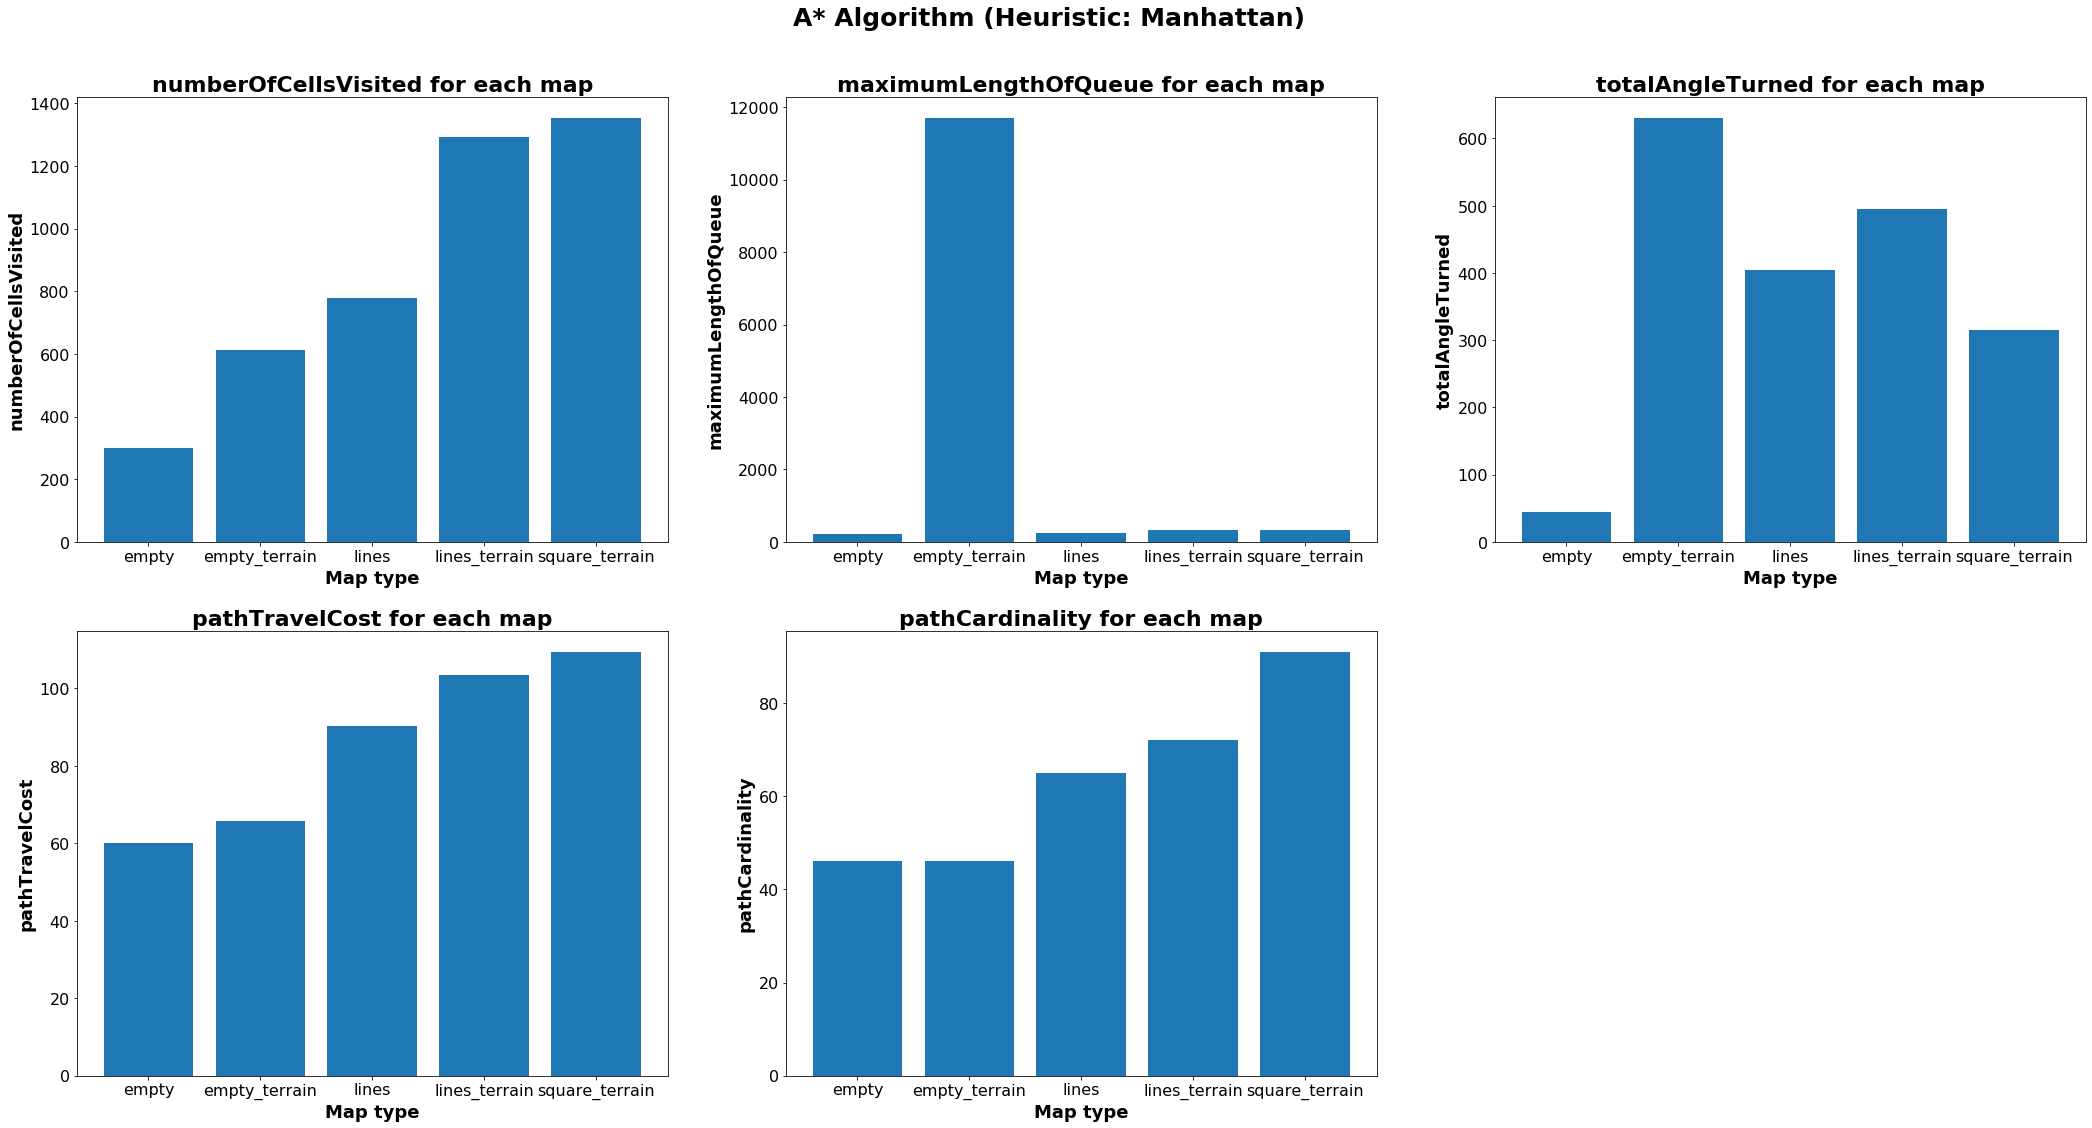

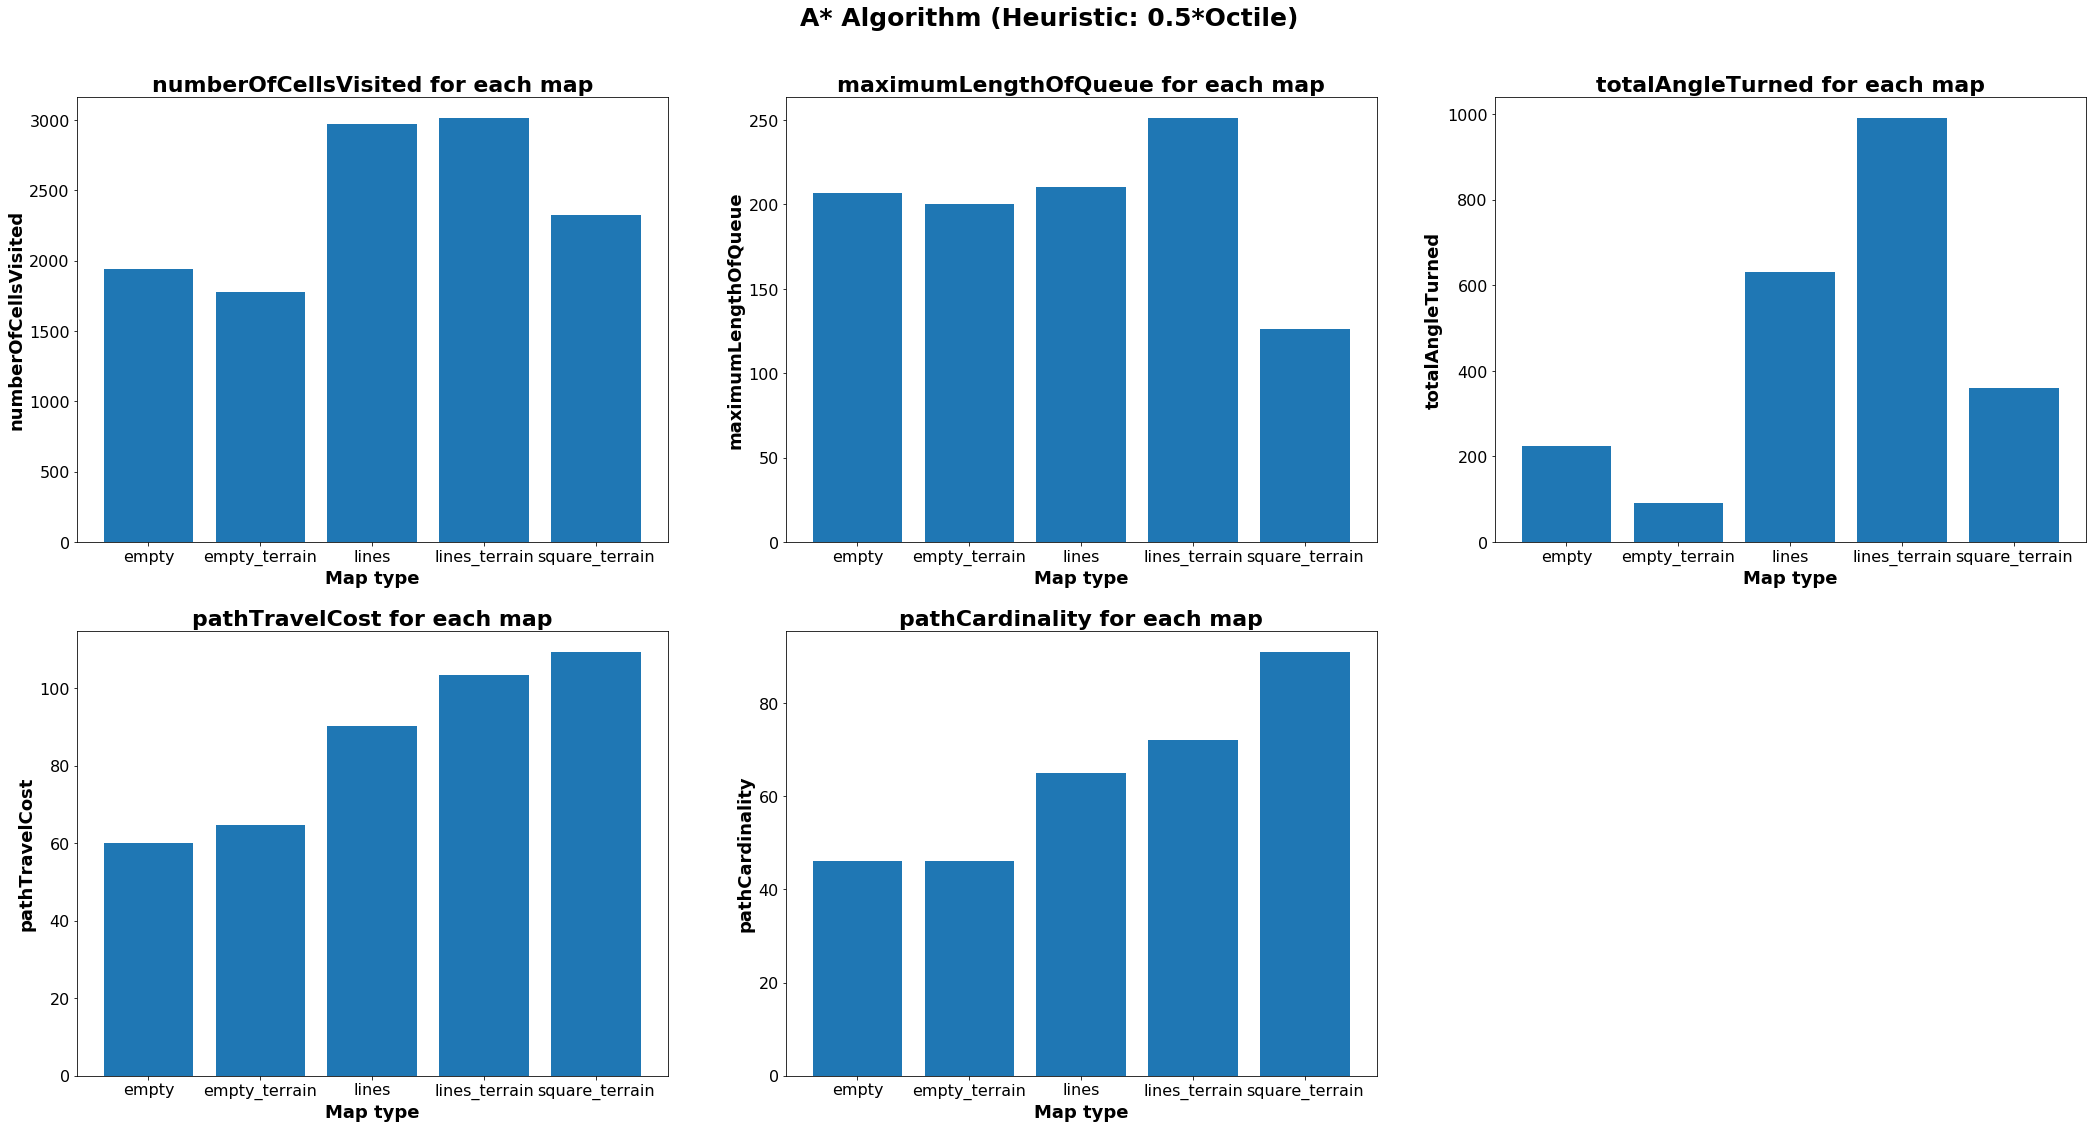

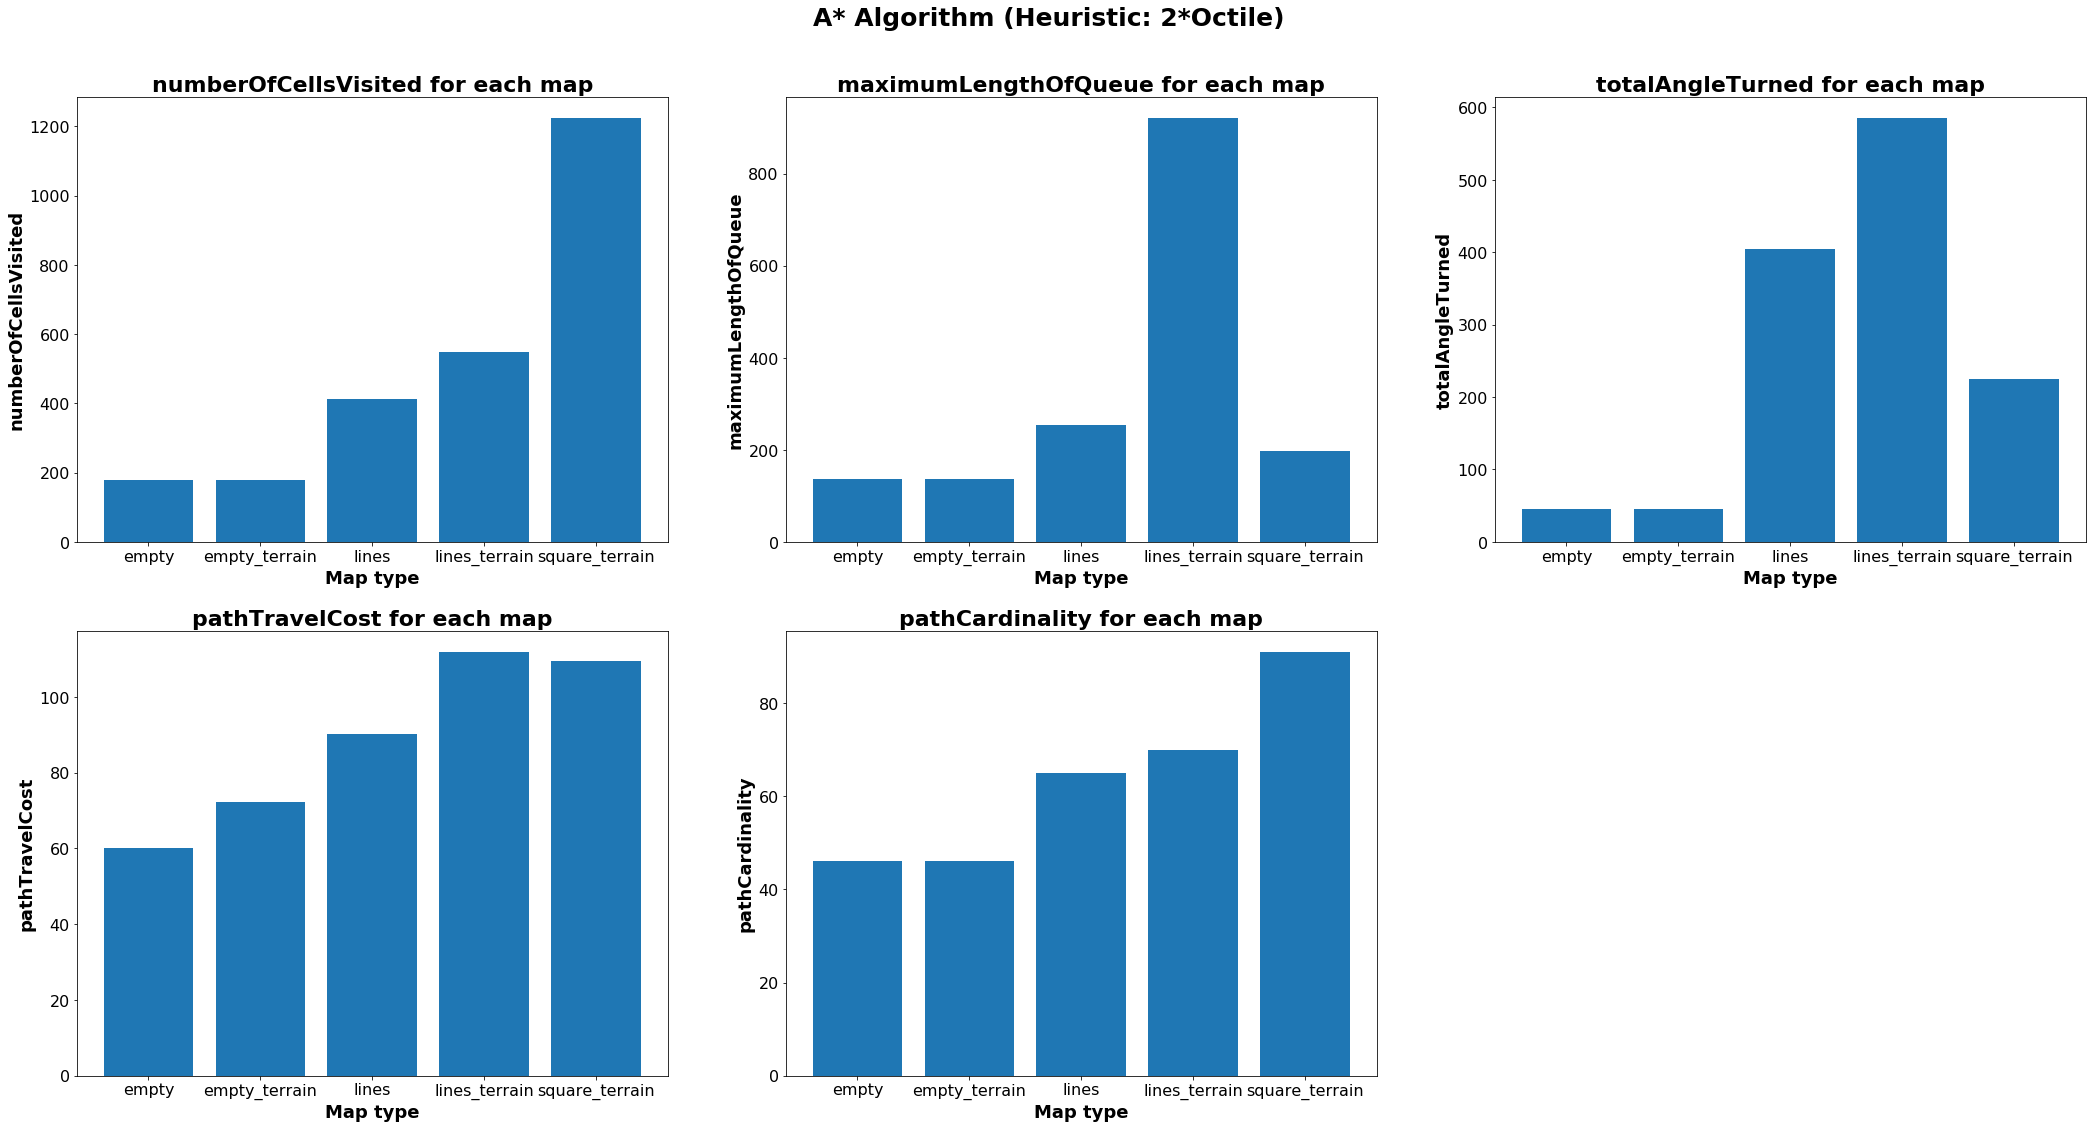

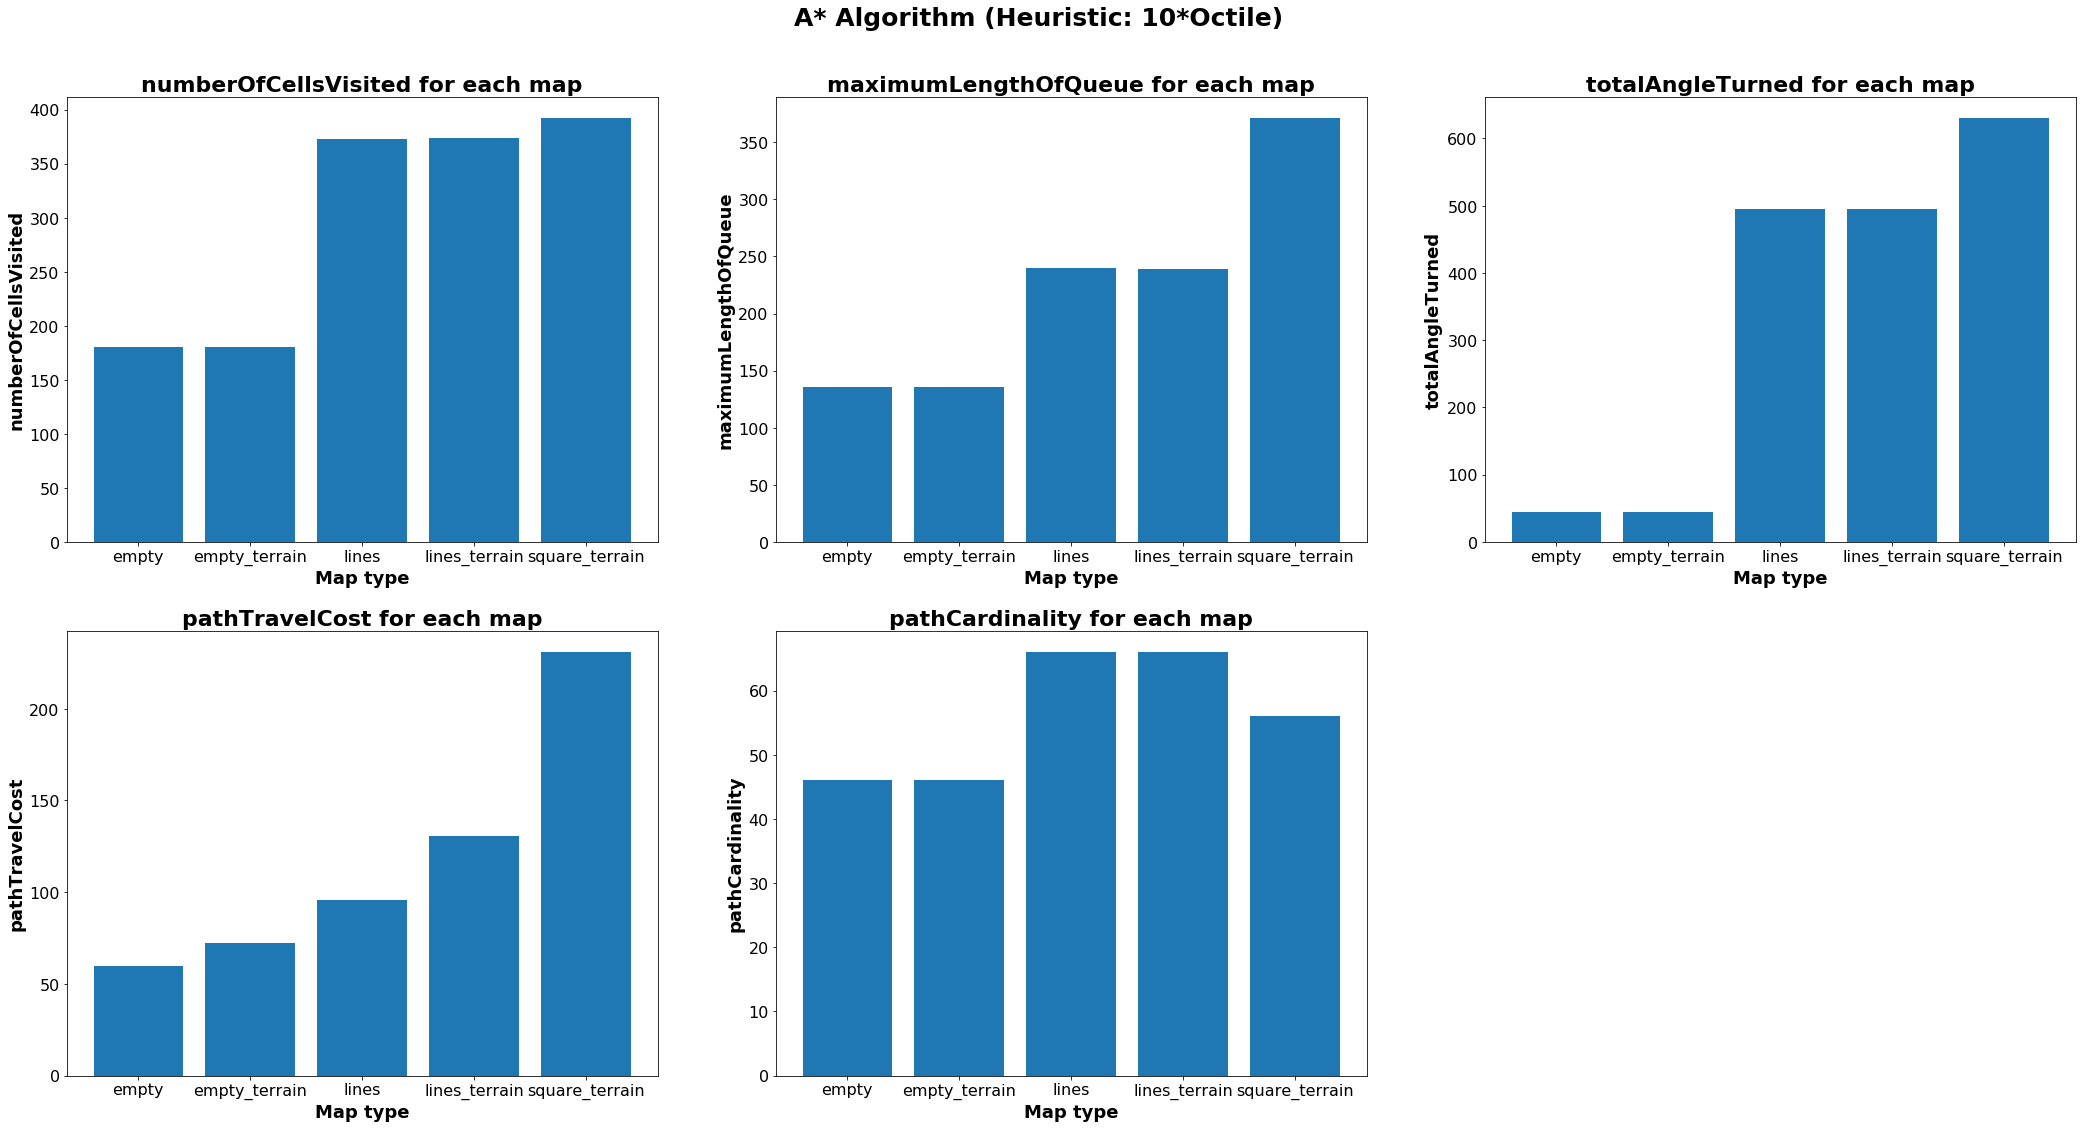

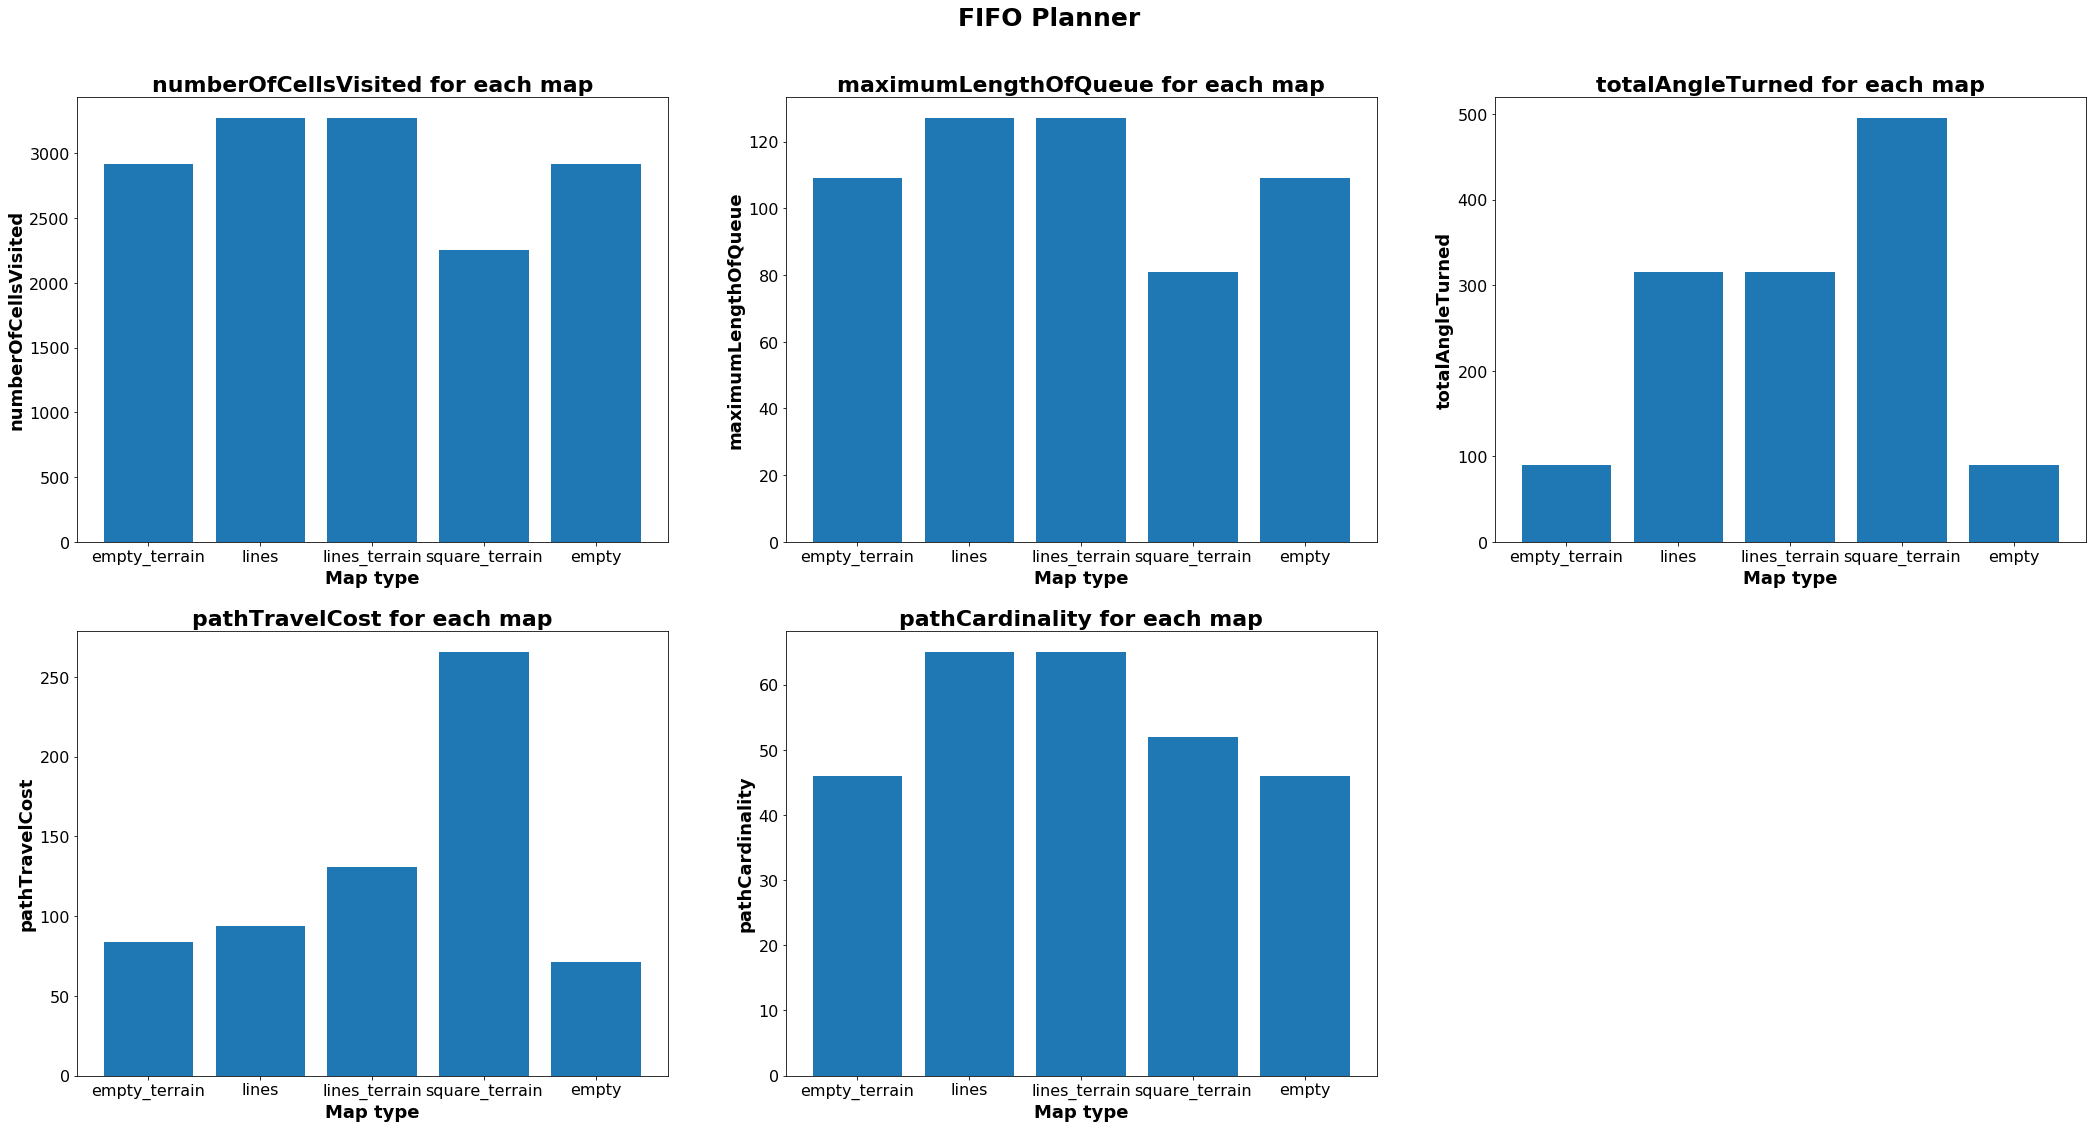

In [8]:
for algorithm in metrics['PlanningAlgorithm'].unique():
    data=metrics[metrics['PlanningAlgorithm']==algorithm]
    fig, ax = plt.subplots(2,3,figsize=(36,18))
    for i in range(len(data.columns[2:])):
        if i<=2:
            row=0
            col=i
        else:
            row=1
            col=i-3
        ax[row][col].bar(data['mapName'],data[data.columns[i+2]])
        ax[row][col].set_title(data.columns[i+2]+' for each map',fontsize=22,fontweight='bold')
        ax[row][col].set_xlabel('Map type',fontsize=18,fontweight='bold')
        ax[row][col].set_ylabel(data.columns[i+2],fontsize=18,fontweight='bold')
        ax[row][col].tick_params(labelsize=16)
    ax[-1][-1].axis('off')
    plt.suptitle(algorithm,fontsize=25,fontweight='bold',y=0.95)
    alg_name = ''.join(c for c in '_'.join(algorithm.split()) if c.isalnum() or c=='_')
    plt.savefig('../report/images/metrics_plot_'+alg_name+'.png')
    plt.show()

### Weighted Graphs

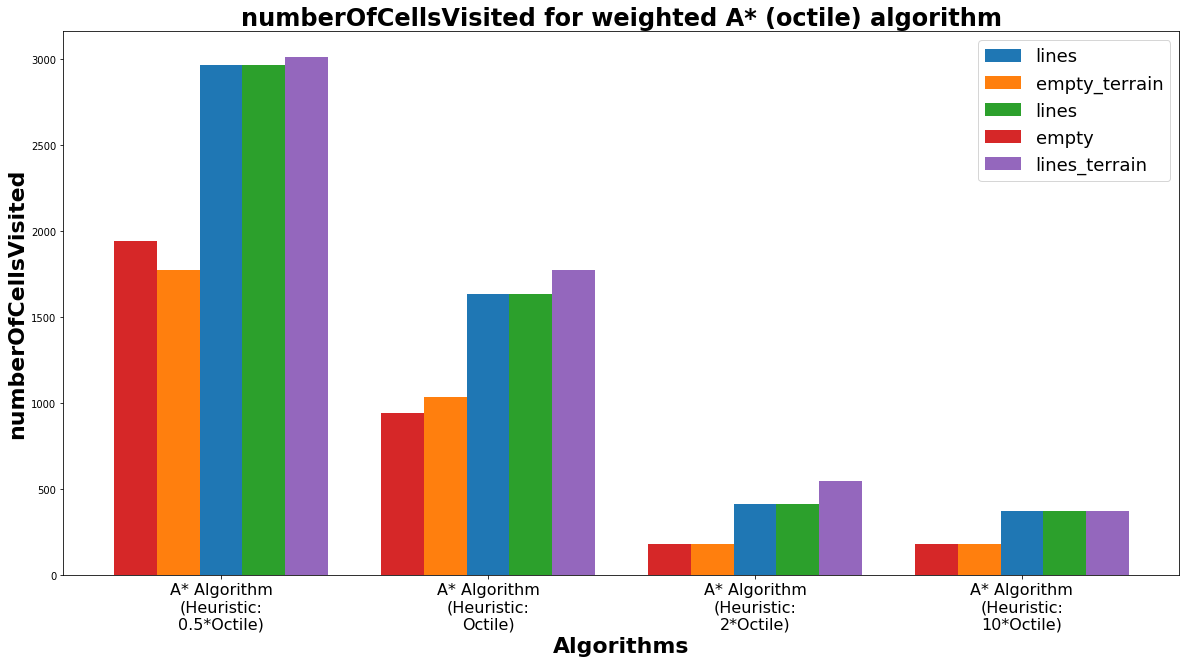

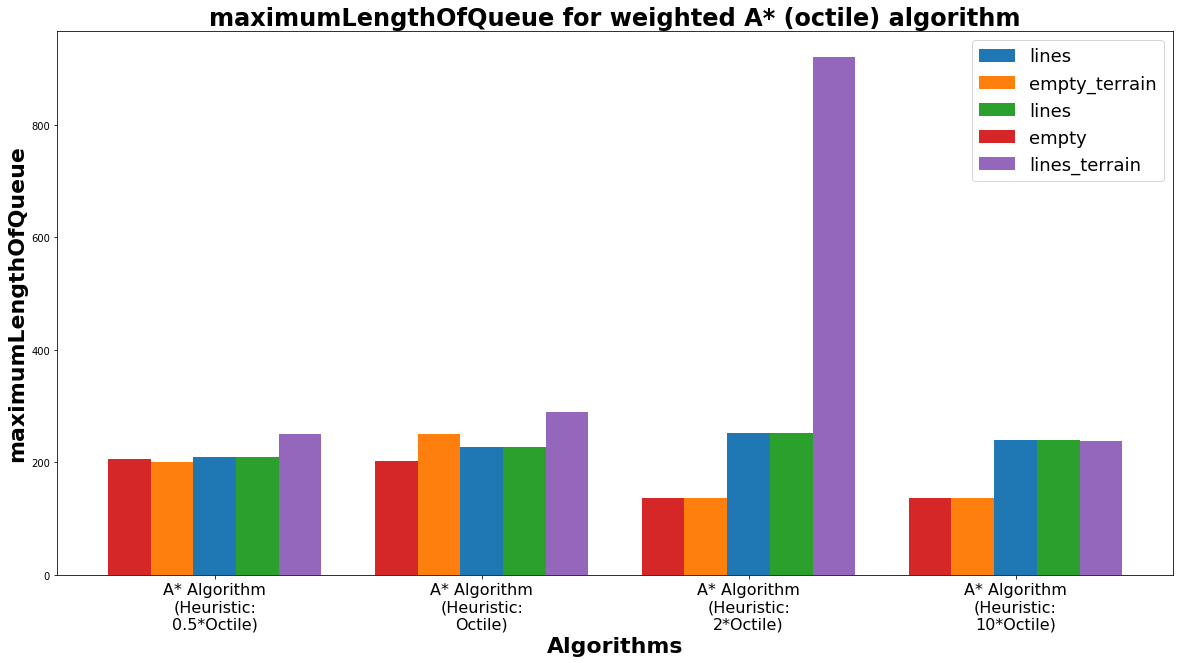

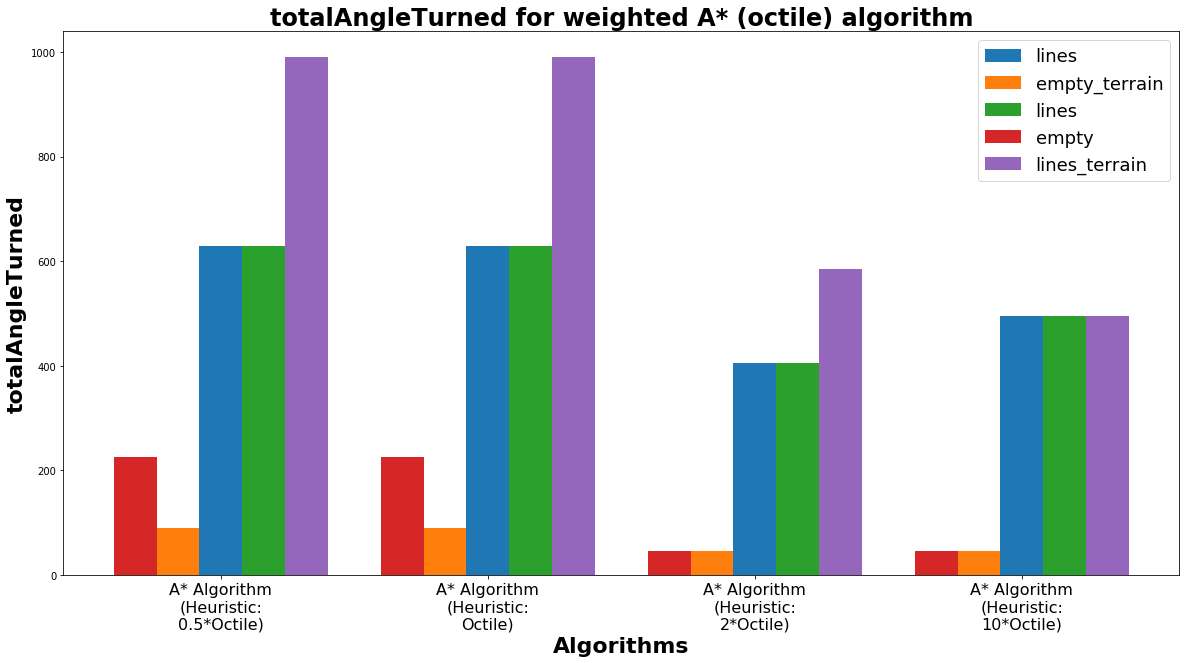

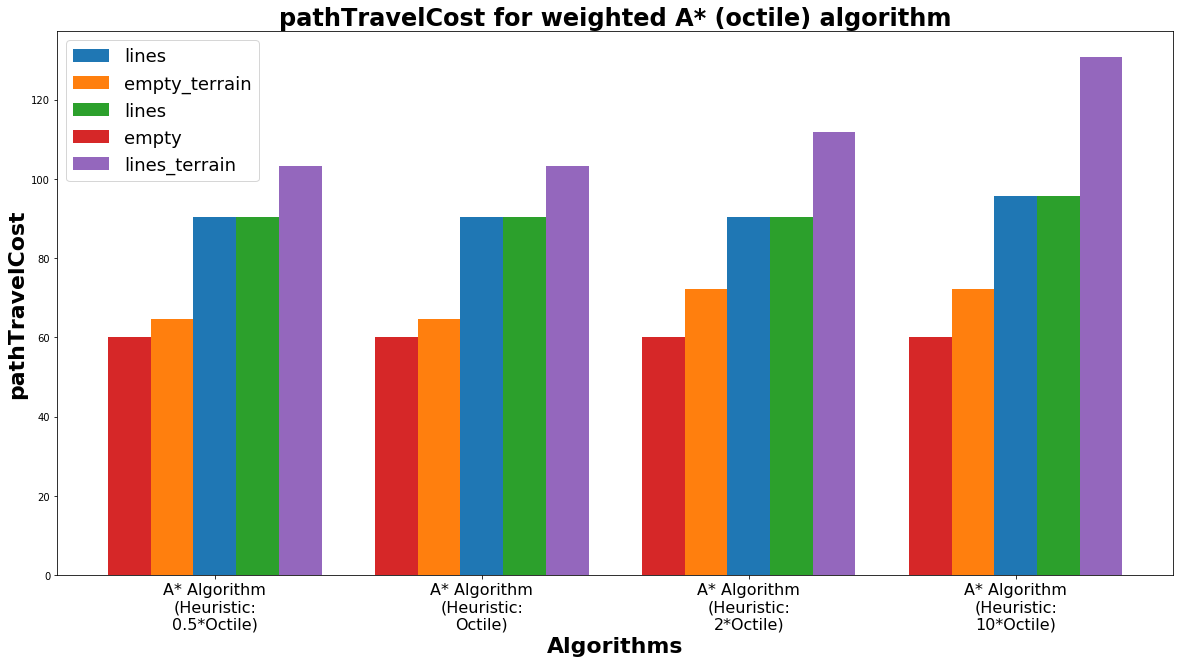

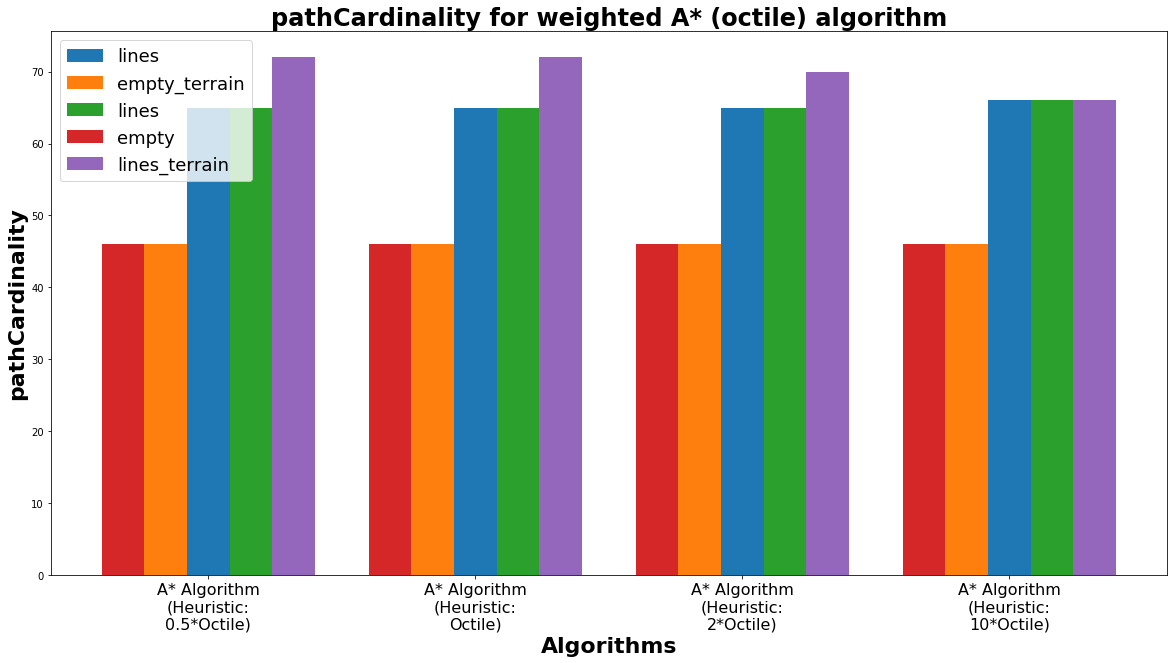

In [9]:
# List of Planning algorithms
planning_algorithms=['A* Algorithm (Heuristic: 0.5*Octile)','A* Algorithm (Heuristic: Octile)', 
                     'A* Algorithm (Heuristic: 2*Octile)','A* Algorithm (Heuristic: 10*Octile)']

for metric in metrics.columns[2:]:
    plot_grouped_bar_graph(metrics, metric,planning_algorithms, savefig=True, title=metric + ' for weighted A* (octile) algorithm',
                           filename = '../report/images/weighted_'+metric, removeEmptyTerrainCase=True)